In [1]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats import multitest
from nilearn import plotting
import nibabel as nib
from nilearn import datasets
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np

In [2]:
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
fsaverage = datasets.fetch_surf_fsaverage()

In [3]:
# The parcellation is already loaded into memory
parcellation_l = destrieux_atlas['map_left']
parcellation_r = destrieux_atlas['map_right']

In [4]:
nl = pd.read_csv('/Users/saigerutherford/Documents/Work/drive-download-20220731T221458Z-001/nilearn_order.csv')

In [5]:
cols = ['ROI']

In [6]:
nl[cols] = nl[cols].apply(lambda x: x.str.strip())

In [7]:
atlas_r = destrieux_atlas['map_right']
atlas_l = destrieux_atlas['map_left']

In [8]:
nl_ROI = nl['ROI'].to_list()

### T-Tests on group mean and variance (across all ROIs)

### UKB race modeled

In [9]:
Z_df = pd.read_csv('/Users/saigerutherford/Documents/Work/drive-download-20220731T221458Z-001/braincharts/models/ukb_race_modeled/deviation_scores.csv')

In [10]:
z_long = Z_df.melt(id_vars=['participant_id','race_1'],
                  value_vars=['rh_G_Ins_lg&S_cent_ins_thickness_Z_estimate',
                             'rh_G&S_cingul-Mid-Post_thickness_Z_estimate',
                             'rh_G&S_subcentral_thickness_Z_estimate',
                             'lh_G_temporal_middle_thickness_Z_estimate',
                             'lh_S_temporal_transverse_thickness_Z_estimate',
                             'rh_G_subcallosal_thickness_Z_estimate',
                             'rh_S_temporal_transverse_thickness_Z_estimate',
                             'rh_G_temp_sup-Lateral_thickness_Z_estimate',
                             'rh_S_subparietal_thickness_Z_estimate',
                             'lh_Pole_temporal_thickness_Z_estimate',
                             'rh_G_precentral_thickness_Z_estimate',
                             'lh_G_oc-temp_lat-fusifor_thickness_Z_estimate',
                             'rh_S_circular_insula_inf_thickness_Z_estimate',
                             'lh_G_cingul-Post-ventral_thickness_Z_estimate',
                             'lh_G_front_inf-Triangul_thickness_Z_estimate',
                             'lh_S_cingul-Marginalis_thickness_Z_estimate',
                             'rh_Lat_Fis-ant-Vertical_thickness_Z_estimate',
                             'lh_G&S_paracentral_thickness_Z_estimate',
                             'rh_S_postcentral_thickness_Z_estimate',
                             'lh_S_circular_insula_inf_thickness_Z_estimate',
                             'rh_G_oc-temp_lat-fusifor_thickness_Z_estimate',
                             'rh_G_cingul-Post-ventral_thickness_Z_estimate',
                             'lh_G&S_transv_frontopol_thickness_Z_estimate',
                             'rh_G_temp_sup-G_T_transv_thickness_Z_estimate',
                             'rh_S_oc-temp_med&Lingual_thickness_Z_estimate',
                             'lh_Lat_Fis-post_thickness_Z_estimate',
                             'lh_S_postcentral_thickness_Z_estimate',
                             'rh_G_rectus_thickness_Z_estimate',
                             'lh_G_temp_sup-G_T_transv_thickness_Z_estimate',
                             'rh_Pole_temporal_thickness_Z_estimate',
                             'lh_S_subparietal_thickness_Z_estimate',
                             'rh_G_cingul-Post-dorsal_thickness_Z_estimate',
                             'lh_S_oc-temp_med&Lingual_thickness_Z_estimate',
                             'rh_S_interm_prim-Jensen_thickness_Z_estimate',
                             'lh_G&S_subcentral_thickness_Z_estimate',
                             'rh_S_oc_sup&transversal_thickness_Z_estimate',
                             'lh_G_subcallosal_thickness_Z_estimate',
                             'rh_S_orbital_lateral_thickness_Z_estimate',
                             'lh_G_insular_short_thickness_Z_estimate',
                             'rh_S_collat_transv_post_thickness_Z_estimate',
                             'lh_S_occipital_ant_thickness_Z_estimate',
                             'rh_S_orbital_med-olfact_thickness_Z_estimate',
                             'lh_G_front_sup_thickness_Z_estimate',
                             'lh_S_precentral-inf-part_thickness_Z_estimate',
                             'lh_G_precentral_thickness_Z_estimate',
                             'rh_G_temporal_middle_thickness_Z_estimate',
                             'lh_S_temporal_inf_thickness_Z_estimate',
                             'rh_G_parietal_sup_thickness_Z_estimate',
                             'lh_S_collat_transv_ant_thickness_Z_estimate',
                             'rh_G_front_sup_thickness_Z_estimate',
                             'rh_S_precentral-inf-part_thickness_Z_estimate',
                             'rh_G_pariet_inf-Angular_thickness_Z_estimate',
                             'lh_S_calcarine_thickness_Z_estimate',
                             'lh_S_orbital-H_Shaped_thickness_Z_estimate',
                             'rh_G_front_inf-Opercular_thickness_Z_estimate',
                             'rh_G_occipital_middle_thickness_Z_estimate',
                             'lh_G_oc-temp_med-Parahip_thickness_Z_estimate',
                             'rh_G_orbital_thickness_Z_estimate',
                             'lh_S_front_inf_thickness_Z_estimate',
                             'rh_S_calcarine_thickness_Z_estimate',
                             'rh_G_occipital_sup_thickness_Z_estimate',
                             'lh_G_front_inf-Opercular_thickness_Z_estimate',
                             'lh_G_front_middle_thickness_Z_estimate',
                             'lh_S_central_thickness_Z_estimate',
                             'rh_S_front_inf_thickness_Z_estimate',
                             'rh_G_oc-temp_med-Parahip_thickness_Z_estimate',
                             'lh_Lat_Fis-ant-Horizont_thickness_Z_estimate',
                             'rh_G_front_inf-Orbital_thickness_Z_estimate',
                             'lh_G_orbital_thickness_Z_estimate',
                             'lh_S_oc_middle&Lunatus_thickness_Z_estimate',
                             'rh_S_central_thickness_Z_estimate',
                             'lh_G_cuneus_thickness_Z_estimate',
                             'rh_G_front_middle_thickness_Z_estimate',
                             'rh_S_precentral-sup-part_thickness_Z_estimate',
                             'rh_Lat_Fis-post_thickness_Z_estimate',
                             'lh_G_temp_sup-Plan_tempo_thickness_Z_estimate',
                             'lh_G_parietal_sup_thickness_Z_estimate',
                             'rh_S_temporal_inf_thickness_Z_estimate',
                             'lh_S_circular_insula_ant_thickness_Z_estimate',
                             'lh_S_precentral-sup-part_thickness_Z_estimate',
                             'lh_S_orbital_lateral_thickness_Z_estimate',
                             'lh_S_parieto_occipital_thickness_Z_estimate',
                             'rh_G&S_cingul-Mid-Ant_thickness_Z_estimate',
                             'rh_G_temp_sup-Plan_tempo_thickness_Z_estimate',
                             'rh_S_circular_insula_ant_thickness_Z_estimate',
                             'rh_MeanThickness_thickness_Z_estimate',
                             'rh_S_orbital-H_Shaped_thickness_Z_estimate',
                             'lh_G_occipital_middle_thickness_Z_estimate',
                             'lh_S_circular_insula_sup_thickness_Z_estimate',
                             'lh_G_pariet_inf-Angular_thickness_Z_estimate',
                             'rh_G&S_paracentral_thickness_Z_estimate',
                             'lh_G_temp_sup-Plan_polar_thickness_Z_estimate',
                             'rh_S_collat_transv_ant_thickness_Z_estimate',
                             'rh_S_circular_insula_sup_thickness_Z_estimate',
                             'rh_G_temp_sup-Plan_polar_thickness_Z_estimate',
                             'rh_Pole_occipital_thickness_Z_estimate',
                             'lh_G_pariet_inf-Supramar_thickness_Z_estimate',
                             'lh_G&S_frontomargin_thickness_Z_estimate',
                             'rh_S_pericallosal_thickness_Z_estimate',
                             'rh_G_pariet_inf-Supramar_thickness_Z_estimate',
                             'rh_S_suborbital_thickness_Z_estimate',
                             'lh_S_pericallosal_thickness_Z_estimate',
                             'rh_S_occipital_ant_thickness_Z_estimate',
                             'lh_Pole_occipital_thickness_Z_estimate',
                             'rh_G_insular_short_thickness_Z_estimate',
                             'lh_G_front_inf-Orbital_thickness_Z_estimate',
                             'rh_G_cuneus_thickness_Z_estimate',
                             'rh_S_oc_middle&Lunatus_thickness_Z_estimate',
                             'lh_G&S_cingul-Mid-Ant_thickness_Z_estimate',
                             'rh_G&S_occipital_inf_thickness_Z_estimate',
                             'rh_Lat_Fis-ant-Horizont_thickness_Z_estimate',
                             'rh_S_parieto_occipital_thickness_Z_estimate',
                             'lh_MeanThickness_thickness_Z_estimate',
                             'rh_G_precuneus_thickness_Z_estimate',
                             'lh_G_temp_sup-Lateral_thickness_Z_estimate',
                             'lh_S_front_middle_thickness_Z_estimate',
                             'lh_G_Ins_lg&S_cent_ins_thickness_Z_estimate',
                             'lh_G_occipital_sup_thickness_Z_estimate',
                             'lh_G_postcentral_thickness_Z_estimate',
                             'rh_S_front_sup_thickness_Z_estimate',
                             'lh_G&S_cingul-Mid-Post_thickness_Z_estimate',
                             'lh_G_precuneus_thickness_Z_estimate',
                             'lh_G&S_cingul-Ant_thickness_Z_estimate',
                             'lh_S_front_sup_thickness_Z_estimate',
                             'lh_S_oc-temp_lat_thickness_Z_estimate',
                             'rh_G&S_frontomargin_thickness_Z_estimate',
                             'lh_Lat_Fis-ant-Vertical_thickness_Z_estimate',
                             'lh_G_temporal_inf_thickness_Z_estimate',
                             'rh_G_front_inf-Triangul_thickness_Z_estimate',
                             'lh_S_temporal_sup_thickness_Z_estimate',
                             'rh_S_cingul-Marginalis_thickness_Z_estimate',
                             'lh_G_rectus_thickness_Z_estimate',
                             'lh_S_interm_prim-Jensen_thickness_Z_estimate',
                             'lh_S_intrapariet&P_trans_thickness_Z_estimate',
                             'lh_G_cingul-Post-dorsal_thickness_Z_estimate',
                             'rh_S_intrapariet&P_trans_thickness_Z_estimate',
                             'rh_G_temporal_inf_thickness_Z_estimate',
                             'rh_G&S_transv_frontopol_thickness_Z_estimate',
                             'lh_G&S_occipital_inf_thickness_Z_estimate',
                             'rh_S_temporal_sup_thickness_Z_estimate',
                             'rh_S_oc-temp_lat_thickness_Z_estimate',
                             'rh_S_front_middle_thickness_Z_estimate',
                             'lh_S_orbital_med-olfact_thickness_Z_estimate',
                             'lh_G_oc-temp_med-Lingual_thickness_Z_estimate',
                             'lh_S_collat_transv_post_thickness_Z_estimate',
                             'lh_S_suborbital_thickness_Z_estimate',
                             'rh_G&S_cingul-Ant_thickness_Z_estimate',
                             'rh_G_postcentral_thickness_Z_estimate',
                             'rh_G_oc-temp_med-Lingual_thickness_Z_estimate',
                             'lh_S_oc_sup&transversal_thickness_Z_estimate'])

In [11]:
z_long_white = z_long.query('race_1 == "White"')
z_long_black = z_long.query('race_1 == "Black"')
z_long_asian = z_long.query('race_1 == "Asian"')

In [12]:
z_white = Z_df.query('race_1 == "White"')
z_black = Z_df.query('race_1 == "Black"')
z_asian = Z_df.query('race_1 == "Asian"')

In [13]:
z_a = z_asian.drop(columns=['participant_id', 'race_1'])
z_b = z_black.drop(columns=['participant_id', 'race_1'])
z_w = z_white.drop(columns=['participant_id', 'race_1'])

In [14]:
z_a_pos = z_a.where(z_a > 2, 0)
z_b_pos = z_b.where(z_b > 2, 0)
z_w_pos = z_w.where(z_w > 2, 0)

In [15]:
z_a_neg = z_a.where(z_a < -2, 0)
z_b_neg = z_b.where(z_b < -2, 0)
z_w_neg = z_w.where(z_w < -2, 0)

In [16]:
viz_a = z_a_pos + z_a_neg
viz_b = z_b_pos + z_b_neg
viz_w = z_w_pos + z_w_neg

In [17]:
viz_a.sort_index(axis=1, inplace=True)
viz_b.sort_index(axis=1, inplace=True)
viz_w.sort_index(axis=1, inplace=True)

In [21]:
import seaborn as sns
sns.set(style="darkgrid",font_scale=0.7)

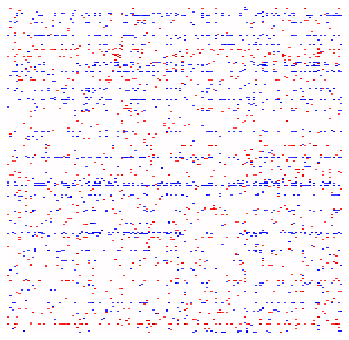

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
g = sns.heatmap(viz_a, center=0, cmap="seismic", cbar=False, ax=ax, linecolor='gray', linewidth=0, xticklabels=False, yticklabels=False)

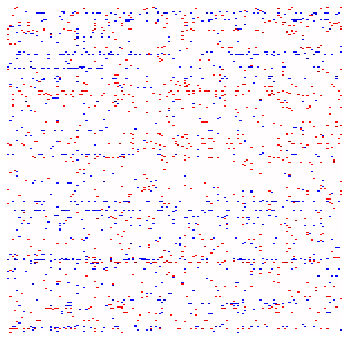

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
g = sns.heatmap(viz_b, center=0, cmap="seismic", cbar=False, ax=ax, linecolor='gray', linewidth=0, xticklabels=False, yticklabels=False)

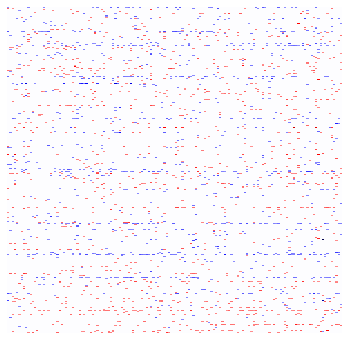

In [31]:
fig, ax = plt.subplots(figsize=(6,6))
g = sns.heatmap(viz_w, center=0, cmap="seismic", cbar=False, ax=ax, linecolor='gray', linewidth=0, xticklabels=False, yticklabels=False)

In [18]:
z_long_white2 = z_long_white.groupby(by='participant_id',as_index=False).mean()

In [19]:
z_long_black2 = z_long_black.groupby(by='participant_id',as_index=False).mean()

In [20]:
z_long_asian2 = z_long_asian.groupby(by='participant_id',as_index=False).mean()

In [21]:
ttest_ind(z_long_white2['value'], z_long_black2['value'], equal_var=False)

Ttest_indResult(statistic=0.13640267581453844, pvalue=0.8915595256466082)

In [22]:
ttest_ind(z_long_white2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=1.813130131248035, pvalue=0.07051885375515746)

In [23]:
ttest_ind(z_long_black2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=1.4286815965326363, pvalue=0.15366646766953332)

### T-Tests on individual ROIs (FDR corrected)

In [24]:
w_deviations = z_white.loc[:, z_white.columns.str.contains('Z_estimate')]

In [25]:
b_deviations = z_black.loc[:, z_black.columns.str.contains('Z_estimate')]

In [26]:
a_deviations = z_asian.loc[:, z_asian.columns.str.contains('Z_estimate')]

In [27]:
z_cols = w_deviations.columns

In [28]:
len(z_cols)

150

In [29]:
w_b_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], b_deviations[column], equal_var=False)
    w_b_pvals_z.loc[index, 'pval'] = test.pvalue
    w_b_pvals_z.loc[index, 'tstat'] = test.statistic
    w_b_pvals_z.loc[index, 'roi'] = column

In [30]:
w_b_fdr_z = multitest.fdrcorrection(w_b_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [31]:
w_b_fdr_z = multitest.multipletests(w_b_pvals_z['pval'], alpha=0.05, method='bonferroni')

In [33]:
w_b_fdr_z[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0.47237216803816084, 1, 1, 1, 1, 1, 1, 1, 0.011533084110339964, 1,
       1, 1, 1, 1, 0.016178676538995265, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0.04872851733007094, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0.027691747109315143, 1, 1, 1, 1, 1, 1, 1, 0.13982527257112107, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0.3121521909760558, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0.49616149284470656, 1, 1, 0.4597233092956459, 1, 1, 1, 1,
       0.9820368551411405, 1, 1, 1, 1, 1, 0.13167047548920335,
       0.5482864511257, 1, 1, 1, 1], dtype=object)

In [34]:
w_b_pvals_z['fdr_pval'] = w_b_fdr_z[1]

In [35]:
w_b_z_sig_diff = w_b_pvals_z.query('fdr_pval < 0.05')

In [36]:
w_b_z_sig_diff

,roi,pval,fdr_pval,tstat
30,lh_S_subparietal_thickness_Z_estimate,0.000077,0.011533,-3.988931
36,lh_G_subcallosal_thickness_Z_estimate,0.000108,0.016179,3.906493
55,rh_G_occipital_middle_thickness_Z_estimate,0.000325,0.048729,-3.621898
83,rh_G_temp_sup-Plan_tempo_thickness_Z_estimate,0.000185,0.027692,3.767298


In [37]:
w_b_z_sig_diff.shape

(4, 4)

In [30]:
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/785070083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/785070083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [31]:
w_b_z_sig_diff[['temp1', 'temp2']] = w_b_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [34]:
df = w_b_z_sig_diff[w_b_z_sig_diff["temp1"].str.contains('left|right')]

In [35]:
df['hemi'] = df['temp1']

In [36]:
df['ROI'] = df['temp2']

In [37]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [38]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [39]:
w_b_z_sig_diff = df

In [40]:
w_b_z_sig_diff_l = w_b_z_sig_diff.query('hemi == "left"')
w_b_z_sig_diff_r = w_b_z_sig_diff.query('hemi == "right"')

In [41]:
nl_w_b_z_sig_diff_l = pd.merge(nl, w_b_z_sig_diff_l, on='ROI', how='left')
nl_w_b_z_sig_diff_r = pd.merge(nl, w_b_z_sig_diff_r, on='ROI', how='left')

In [42]:
nl_w_b_z_sig_diff_l['tstat'] = nl_w_b_z_sig_diff_l['tstat'].fillna(0)
nl_w_b_z_sig_diff_r['tstat'] = nl_w_b_z_sig_diff_r['tstat'].fillna(0)

In [43]:
nl_w_b_z_sig_diff_l = nl_w_b_z_sig_diff_l['tstat'].to_numpy()
nl_w_b_z_sig_diff_r = nl_w_b_z_sig_diff_r['tstat'].to_numpy()

In [44]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_b_z_sig_diff_l[i], parcellation_l)

In [45]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_b_z_sig_diff_r[i], parcellation_r)

In [48]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_racemodeled_WvB_Z_l.png');

In [49]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_racemodeled_WvB_Z_r.png');

In [50]:
w_a_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], a_deviations[column], equal_var=False)
    w_a_pvals_z.loc[index, 'pval'] = test.pvalue
    w_a_pvals_z.loc[index, 'tstat'] = test.statistic
    w_a_pvals_z.loc[index, 'roi'] = column

In [51]:
w_a_fdr_z = multitest.fdrcorrection(w_a_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [52]:
w_a_pvals_z['fdr_pval'] = w_a_fdr_z[1]

In [53]:
w_a_z_sig_diff = w_a_pvals_z.query('fdr_pval < 0.05')

In [54]:
w_a_z_sig_diff

,fdr_pval,pval,roi,tstat
6,0.016929,0.001475,rh_S_temporal_transverse_thickness_Z_estimate,3.199738
13,0.0,0.0,lh_G_cingul-Post-ventral_thickness_Z_estimate,-6.35128
21,0.036803,0.006379,rh_G_cingul-Post-ventral_thickness_Z_estimate,-2.740469
25,0.013794,0.000828,lh_Lat_Fis-post_thickness_Z_estimate,3.364587
35,0.017411,0.001857,rh_S_oc_sup&transversal_thickness_Z_estimate,3.130387
36,0.026771,0.004099,lh_G_subcallosal_thickness_Z_estimate,-2.886079
40,0.026529,0.003537,lh_S_occipital_ant_thickness_Z_estimate,2.93215
52,0.044186,0.008248,lh_S_calcarine_thickness_Z_estimate,2.653135
54,0.001039,0.000028,rh_G_front_inf-Opercular_thickness_Z_estimate,4.238122
61,0.018598,0.002108,lh_G_front_inf-Opercular_thickness_Z_estimate,3.093373


In [55]:
w_a_z_sig_diff.shape

(29, 4)

In [56]:
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/703599908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/703599908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [57]:
w_a_z_sig_diff[['temp1', 'temp2']] = w_a_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [58]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [60]:
df = w_a_z_sig_diff[w_a_z_sig_diff["temp1"].str.contains('left|right')]

In [61]:
df['hemi'] = df['temp1']

In [62]:
df['ROI'] = df['temp2']

In [63]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [64]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [65]:
w_a_z_sig_diff = df

In [66]:
w_a_z_sig_diff_l = w_a_z_sig_diff.query('hemi == "left"')
w_a_z_sig_diff_r = w_a_z_sig_diff.query('hemi == "right"')

In [67]:
nl_w_a_z_sig_diff_l = pd.merge(nl, w_a_z_sig_diff_l, on='ROI', how='left')
nl_w_a_z_sig_diff_r = pd.merge(nl, w_a_z_sig_diff_r, on='ROI', how='left')

In [68]:
nl_w_a_z_sig_diff_l['tstat'] = nl_w_a_z_sig_diff_l['tstat'].fillna(0)
nl_w_a_z_sig_diff_r['tstat'] = nl_w_a_z_sig_diff_r['tstat'].fillna(0)

In [69]:
nl_w_a_z_sig_diff_l = nl_w_a_z_sig_diff_l['tstat'].to_numpy()
nl_w_a_z_sig_diff_r = nl_w_a_z_sig_diff_r['tstat'].to_numpy()

In [70]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_a_z_sig_diff_l[i], parcellation_l)

In [71]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_a_z_sig_diff_r[i], parcellation_r)

In [72]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_racemodeled_WvA_Z_l.png');

In [73]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_racemodeled_WvA_Z_r.png');

### T-Tests on group mean and variance (across all ROIs)

### UKB race not modeled

In [32]:
Z_df = pd.read_csv('/Users/saigerutherford/Documents/Work/drive-download-20220731T221458Z-001/braincharts/models/ukb_race_not_modeled/deviation_scores.csv')

In [33]:
z_long = Z_df.melt(id_vars=['participant_id','race_1'],
                  value_vars=['rh_G_Ins_lg&S_cent_ins_thickness_Z_estimate',
                             'rh_G&S_cingul-Mid-Post_thickness_Z_estimate',
                             'rh_G&S_subcentral_thickness_Z_estimate',
                             'lh_G_temporal_middle_thickness_Z_estimate',
                             'lh_S_temporal_transverse_thickness_Z_estimate',
                             'rh_G_subcallosal_thickness_Z_estimate',
                             'rh_S_temporal_transverse_thickness_Z_estimate',
                             'rh_G_temp_sup-Lateral_thickness_Z_estimate',
                             'rh_S_subparietal_thickness_Z_estimate',
                             'lh_Pole_temporal_thickness_Z_estimate',
                             'rh_G_precentral_thickness_Z_estimate',
                             'lh_G_oc-temp_lat-fusifor_thickness_Z_estimate',
                             'rh_S_circular_insula_inf_thickness_Z_estimate',
                             'lh_G_cingul-Post-ventral_thickness_Z_estimate',
                             'lh_G_front_inf-Triangul_thickness_Z_estimate',
                             'lh_S_cingul-Marginalis_thickness_Z_estimate',
                             'rh_Lat_Fis-ant-Vertical_thickness_Z_estimate',
                             'lh_G&S_paracentral_thickness_Z_estimate',
                             'rh_S_postcentral_thickness_Z_estimate',
                             'lh_S_circular_insula_inf_thickness_Z_estimate',
                             'rh_G_oc-temp_lat-fusifor_thickness_Z_estimate',
                             'rh_G_cingul-Post-ventral_thickness_Z_estimate',
                             'lh_G&S_transv_frontopol_thickness_Z_estimate',
                             'rh_G_temp_sup-G_T_transv_thickness_Z_estimate',
                             'rh_S_oc-temp_med&Lingual_thickness_Z_estimate',
                             'lh_Lat_Fis-post_thickness_Z_estimate',
                             'lh_S_postcentral_thickness_Z_estimate',
                             'rh_G_rectus_thickness_Z_estimate',
                             'lh_G_temp_sup-G_T_transv_thickness_Z_estimate',
                             'rh_Pole_temporal_thickness_Z_estimate',
                             'lh_S_subparietal_thickness_Z_estimate',
                             'rh_G_cingul-Post-dorsal_thickness_Z_estimate',
                             'lh_S_oc-temp_med&Lingual_thickness_Z_estimate',
                             'rh_S_interm_prim-Jensen_thickness_Z_estimate',
                             'lh_G&S_subcentral_thickness_Z_estimate',
                             'rh_S_oc_sup&transversal_thickness_Z_estimate',
                             'lh_G_subcallosal_thickness_Z_estimate',
                             'rh_S_orbital_lateral_thickness_Z_estimate',
                             'lh_G_insular_short_thickness_Z_estimate',
                             'rh_S_collat_transv_post_thickness_Z_estimate',
                             'lh_S_occipital_ant_thickness_Z_estimate',
                             'rh_S_orbital_med-olfact_thickness_Z_estimate',
                             'lh_G_front_sup_thickness_Z_estimate',
                             'lh_S_precentral-inf-part_thickness_Z_estimate',
                             'lh_G_precentral_thickness_Z_estimate',
                             'rh_G_temporal_middle_thickness_Z_estimate',
                             'lh_S_temporal_inf_thickness_Z_estimate',
                             'rh_G_parietal_sup_thickness_Z_estimate',
                             'lh_S_collat_transv_ant_thickness_Z_estimate',
                             'rh_G_front_sup_thickness_Z_estimate',
                             'rh_S_precentral-inf-part_thickness_Z_estimate',
                             'rh_G_pariet_inf-Angular_thickness_Z_estimate',
                             'lh_S_calcarine_thickness_Z_estimate',
                             'lh_S_orbital-H_Shaped_thickness_Z_estimate',
                             'rh_G_front_inf-Opercular_thickness_Z_estimate',
                             'rh_G_occipital_middle_thickness_Z_estimate',
                             'lh_G_oc-temp_med-Parahip_thickness_Z_estimate',
                             'rh_G_orbital_thickness_Z_estimate',
                             'lh_S_front_inf_thickness_Z_estimate',
                             'rh_S_calcarine_thickness_Z_estimate',
                             'rh_G_occipital_sup_thickness_Z_estimate',
                             'lh_G_front_inf-Opercular_thickness_Z_estimate',
                             'lh_G_front_middle_thickness_Z_estimate',
                             'lh_S_central_thickness_Z_estimate',
                             'rh_S_front_inf_thickness_Z_estimate',
                             'rh_G_oc-temp_med-Parahip_thickness_Z_estimate',
                             'lh_Lat_Fis-ant-Horizont_thickness_Z_estimate',
                             'rh_G_front_inf-Orbital_thickness_Z_estimate',
                             'lh_G_orbital_thickness_Z_estimate',
                             'lh_S_oc_middle&Lunatus_thickness_Z_estimate',
                             'rh_S_central_thickness_Z_estimate',
                             'lh_G_cuneus_thickness_Z_estimate',
                             'rh_G_front_middle_thickness_Z_estimate',
                             'rh_S_precentral-sup-part_thickness_Z_estimate',
                             'rh_Lat_Fis-post_thickness_Z_estimate',
                             'lh_G_temp_sup-Plan_tempo_thickness_Z_estimate',
                             'lh_G_parietal_sup_thickness_Z_estimate',
                             'rh_S_temporal_inf_thickness_Z_estimate',
                             'lh_S_circular_insula_ant_thickness_Z_estimate',
                             'lh_S_precentral-sup-part_thickness_Z_estimate',
                             'lh_S_orbital_lateral_thickness_Z_estimate',
                             'lh_S_parieto_occipital_thickness_Z_estimate',
                             'rh_G&S_cingul-Mid-Ant_thickness_Z_estimate',
                             'rh_G_temp_sup-Plan_tempo_thickness_Z_estimate',
                             'rh_S_circular_insula_ant_thickness_Z_estimate',
                             'rh_MeanThickness_thickness_Z_estimate',
                             'rh_S_orbital-H_Shaped_thickness_Z_estimate',
                             'lh_G_occipital_middle_thickness_Z_estimate',
                             'lh_S_circular_insula_sup_thickness_Z_estimate',
                             'lh_G_pariet_inf-Angular_thickness_Z_estimate',
                             'rh_G&S_paracentral_thickness_Z_estimate',
                             'lh_G_temp_sup-Plan_polar_thickness_Z_estimate',
                             'rh_S_collat_transv_ant_thickness_Z_estimate',
                             'rh_S_circular_insula_sup_thickness_Z_estimate',
                             'rh_G_temp_sup-Plan_polar_thickness_Z_estimate',
                             'rh_Pole_occipital_thickness_Z_estimate',
                             'lh_G_pariet_inf-Supramar_thickness_Z_estimate',
                             'lh_G&S_frontomargin_thickness_Z_estimate',
                             'rh_S_pericallosal_thickness_Z_estimate',
                             'rh_G_pariet_inf-Supramar_thickness_Z_estimate',
                             'rh_S_suborbital_thickness_Z_estimate',
                             'lh_S_pericallosal_thickness_Z_estimate',
                             'rh_S_occipital_ant_thickness_Z_estimate',
                             'lh_Pole_occipital_thickness_Z_estimate',
                             'rh_G_insular_short_thickness_Z_estimate',
                             'lh_G_front_inf-Orbital_thickness_Z_estimate',
                             'rh_G_cuneus_thickness_Z_estimate',
                             'rh_S_oc_middle&Lunatus_thickness_Z_estimate',
                             'lh_G&S_cingul-Mid-Ant_thickness_Z_estimate',
                             'rh_G&S_occipital_inf_thickness_Z_estimate',
                             'rh_Lat_Fis-ant-Horizont_thickness_Z_estimate',
                             'rh_S_parieto_occipital_thickness_Z_estimate',
                             'lh_MeanThickness_thickness_Z_estimate',
                             'rh_G_precuneus_thickness_Z_estimate',
                             'lh_G_temp_sup-Lateral_thickness_Z_estimate',
                             'lh_S_front_middle_thickness_Z_estimate',
                             'lh_G_Ins_lg&S_cent_ins_thickness_Z_estimate',
                             'lh_G_occipital_sup_thickness_Z_estimate',
                             'lh_G_postcentral_thickness_Z_estimate',
                             'rh_S_front_sup_thickness_Z_estimate',
                             'lh_G&S_cingul-Mid-Post_thickness_Z_estimate',
                             'lh_G_precuneus_thickness_Z_estimate',
                             'lh_G&S_cingul-Ant_thickness_Z_estimate',
                             'lh_S_front_sup_thickness_Z_estimate',
                             'lh_S_oc-temp_lat_thickness_Z_estimate',
                             'rh_G&S_frontomargin_thickness_Z_estimate',
                             'lh_Lat_Fis-ant-Vertical_thickness_Z_estimate',
                             'lh_G_temporal_inf_thickness_Z_estimate',
                             'rh_G_front_inf-Triangul_thickness_Z_estimate',
                             'lh_S_temporal_sup_thickness_Z_estimate',
                             'rh_S_cingul-Marginalis_thickness_Z_estimate',
                             'lh_G_rectus_thickness_Z_estimate',
                             'lh_S_interm_prim-Jensen_thickness_Z_estimate',
                             'lh_S_intrapariet&P_trans_thickness_Z_estimate',
                             'lh_G_cingul-Post-dorsal_thickness_Z_estimate',
                             'rh_S_intrapariet&P_trans_thickness_Z_estimate',
                             'rh_G_temporal_inf_thickness_Z_estimate',
                             'rh_G&S_transv_frontopol_thickness_Z_estimate',
                             'lh_G&S_occipital_inf_thickness_Z_estimate',
                             'rh_S_temporal_sup_thickness_Z_estimate',
                             'rh_S_oc-temp_lat_thickness_Z_estimate',
                             'rh_S_front_middle_thickness_Z_estimate',
                             'lh_S_orbital_med-olfact_thickness_Z_estimate',
                             'lh_G_oc-temp_med-Lingual_thickness_Z_estimate',
                             'lh_S_collat_transv_post_thickness_Z_estimate',
                             'lh_S_suborbital_thickness_Z_estimate',
                             'rh_G&S_cingul-Ant_thickness_Z_estimate',
                             'rh_G_postcentral_thickness_Z_estimate',
                             'rh_G_oc-temp_med-Lingual_thickness_Z_estimate',
                             'lh_S_oc_sup&transversal_thickness_Z_estimate'])

In [34]:
z_long_white = z_long.query('race_1 == "White"')
z_long_black = z_long.query('race_1 == "Black"')
z_long_asian = z_long.query('race_1 == "Asian"')

In [35]:
z_white = Z_df.query('race_1 == "White"')
z_black = Z_df.query('race_1 == "Black"')
z_asian = Z_df.query('race_1 == "Asian"')

In [78]:
z_long_white2 = z_long_white.groupby(by='participant_id',as_index=False).mean()

In [79]:
z_long_black2 = z_long_black.groupby(by='participant_id',as_index=False).mean()

In [80]:
z_long_asian2 = z_long_asian.groupby(by='participant_id',as_index=False).mean()

In [81]:
ttest_ind(z_long_white2['value'], z_long_black2['value'], equal_var=False)

Ttest_indResult(statistic=2.8687110482084894, pvalue=0.004302137728061506)

In [82]:
ttest_ind(z_long_white2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=1.7665105950565898, pvalue=0.0780335661191895)

In [83]:
ttest_ind(z_long_black2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=-0.672071820800716, pvalue=0.5018217558455804)

### T-Tests on individual ROIs (FDR corrected)

### UKB race not modeled

In [84]:
w_deviations = z_white.loc[:, z_white.columns.str.contains('Z_estimate')]

In [85]:
b_deviations = z_black.loc[:, z_black.columns.str.contains('Z_estimate')]

In [86]:
a_deviations = z_asian.loc[:, z_asian.columns.str.contains('Z_estimate')]

In [87]:
z_cols = w_deviations.columns

In [88]:
len(z_cols)

150

In [89]:
w_b_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], b_deviations[column], equal_var=False)
    w_b_pvals_z.loc[index, 'pval'] = test.pvalue
    w_b_pvals_z.loc[index, 'tstat'] = test.statistic
    w_b_pvals_z.loc[index, 'roi'] = column

In [90]:
w_b_fdr_z = multitest.fdrcorrection(w_b_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [91]:
w_b_pvals_z['fdr_pval'] = w_b_fdr_z[1]

In [92]:
w_b_z_sig_diff = w_b_pvals_z.query('fdr_pval < 0.05')

In [93]:
w_b_z_sig_diff

,fdr_pval,pval,roi,tstat
2,0.006989,0.002004,rh_G&S_subcentral_thickness_Z_estimate,3.106561
5,0.042499,0.015866,rh_G_subcallosal_thickness_Z_estimate,2.420921
6,0.000038,0.000003,rh_S_temporal_transverse_thickness_Z_estimate,4.713995
13,0.007177,0.002153,lh_G_cingul-Post-ventral_thickness_Z_estimate,3.083947
17,0.000002,0.0,lh_G&S_paracentral_thickness_Z_estimate,5.421771
18,0.000002,0.0,rh_S_postcentral_thickness_Z_estimate,5.353075
21,0.000053,0.000006,rh_G_cingul-Post-ventral_thickness_Z_estimate,4.590341
23,0.000155,0.00002,rh_G_temp_sup-G_T_transv_thickness_Z_estimate,4.309971
24,0.000046,0.000005,rh_S_oc-temp_med&Lingual_thickness_Z_estimate,4.635515
25,0.000001,0.0,lh_Lat_Fis-post_thickness_Z_estimate,5.73137


In [94]:
w_b_z_sig_diff.shape

(56, 4)

In [95]:
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/785070083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/785070083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [96]:
w_b_z_sig_diff[['temp1', 'temp2']] = w_b_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [97]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [98]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [99]:
df = w_b_z_sig_diff[w_b_z_sig_diff["temp1"].str.contains('left|right')]

In [100]:
df['hemi'] = df['temp1']

In [101]:
df['ROI'] = df['temp2']

In [102]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [103]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [104]:
w_b_z_sig_diff = df

In [105]:
w_b_z_sig_diff_l = w_b_z_sig_diff.query('hemi == "left"')
w_b_z_sig_diff_r = w_b_z_sig_diff.query('hemi == "right"')

In [106]:
nl_w_b_z_sig_diff_l = pd.merge(nl, w_b_z_sig_diff_l, on='ROI', how='left')
nl_w_b_z_sig_diff_r = pd.merge(nl, w_b_z_sig_diff_r, on='ROI', how='left')

In [107]:
nl_w_b_z_sig_diff_l['tstat'] = nl_w_b_z_sig_diff_l['tstat'].fillna(0)
nl_w_b_z_sig_diff_r['tstat'] = nl_w_b_z_sig_diff_r['tstat'].fillna(0)

In [108]:
nl_w_b_z_sig_diff_l = nl_w_b_z_sig_diff_l['tstat'].to_numpy()
nl_w_b_z_sig_diff_r = nl_w_b_z_sig_diff_r['tstat'].to_numpy()

In [109]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_b_z_sig_diff_l[i], parcellation_l)

In [110]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_b_z_sig_diff_r[i], parcellation_r)

In [112]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_racenotmodeled_WvB_Z_l.png');

In [113]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_racenotmodeled_WvB_Z_r.png');

In [114]:
w_a_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], a_deviations[column], equal_var=False)
    w_a_pvals_z.loc[index, 'pval'] = test.pvalue
    w_a_pvals_z.loc[index, 'tstat'] = test.statistic
    w_a_pvals_z.loc[index, 'roi'] = column

In [115]:
w_a_fdr_z = multitest.fdrcorrection(w_a_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [116]:
w_a_pvals_z['fdr_pval'] = w_a_fdr_z[1]

In [117]:
w_a_z_sig_diff = w_a_pvals_z.query('fdr_pval < 0.05')

In [118]:
w_a_z_sig_diff

,fdr_pval,pval,roi,tstat
2,0.015594,0.002391,rh_G&S_subcentral_thickness_Z_estimate,3.053077
4,0.016156,0.002585,lh_S_temporal_transverse_thickness_Z_estimate,3.029842
7,0.012615,0.001766,rh_G_temp_sup-Lateral_thickness_Z_estimate,3.1459
12,0.001274,0.00009,rh_S_circular_insula_inf_thickness_Z_estimate,3.952027
18,0.000131,0.000003,rh_S_postcentral_thickness_Z_estimate,4.695628
19,0.020538,0.003423,lh_S_circular_insula_inf_thickness_Z_estimate,2.941658
23,0.001341,0.000134,rh_G_temp_sup-G_T_transv_thickness_Z_estimate,3.851824
25,0.00112,0.000067,lh_Lat_Fis-post_thickness_Z_estimate,4.021235
26,0.000497,0.00002,lh_S_postcentral_thickness_Z_estimate,4.312999
28,0.000055,0.000001,lh_G_temp_sup-G_T_transv_thickness_Z_estimate,5.05098


In [119]:
w_a_z_sig_diff.shape

(37, 4)

In [120]:
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/703599908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/703599908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [121]:
w_a_z_sig_diff[['temp1', 'temp2']] = w_a_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [122]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [123]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [124]:
df = w_a_z_sig_diff[w_a_z_sig_diff["temp1"].str.contains('left|right')]

In [125]:
df['hemi'] = df['temp1']

In [126]:
df['ROI'] = df['temp2']

In [127]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [128]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [129]:
w_a_z_sig_diff = df

In [130]:
w_a_z_sig_diff_l = w_a_z_sig_diff.query('hemi == "left"')
w_a_z_sig_diff_r = w_a_z_sig_diff.query('hemi == "right"')

In [131]:
nl_w_a_z_sig_diff_l = pd.merge(nl, w_a_z_sig_diff_l, on='ROI', how='left')
nl_w_a_z_sig_diff_r = pd.merge(nl, w_a_z_sig_diff_r, on='ROI', how='left')

In [132]:
nl_w_a_z_sig_diff_l['tstat'] = nl_w_a_z_sig_diff_l['tstat'].fillna(0)
nl_w_a_z_sig_diff_r['tstat'] = nl_w_a_z_sig_diff_r['tstat'].fillna(0)

In [133]:
nl_w_a_z_sig_diff_l = nl_w_a_z_sig_diff_l['tstat'].to_numpy()
nl_w_a_z_sig_diff_r = nl_w_a_z_sig_diff_r['tstat'].to_numpy()

In [134]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_a_z_sig_diff_l[i], parcellation_l)

In [135]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_a_z_sig_diff_r[i], parcellation_r)

In [136]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_racenotmodeled_WvA_Z_l.png');

In [137]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_racenotmodeled_WvA_Z_r.png');

### T-Tests on group mean and variance (across all ROIs)

### UKB pretrained

In [44]:
Z_df = pd.read_csv('/Users/saigerutherford/Documents/Work/drive-download-20220731T221458Z-001/pretrained_nm_z_demos_ukb.csv')

In [45]:
keep_cols = ['sub_id','race_1','rh_S_cingul-Marginalis_thickness_Z_predict',
 'rh_S_collat_transv_ant_thickness_Z_predict',
 'Left-Amygdala_Z_predict',
 'lh_S_orbital-H_Shaped_thickness_Z_predict',
 'lh_G&S_frontomargin_thickness_Z_predict',
 'Right-vessel_Z_predict',
 'Right-Thalamus-Proper_Z_predict',
 'rh_G&S_cingul-Mid-Post_thickness_Z_predict',
 'rh_G&S_paracentral_thickness_Z_predict',
 'Right-Inf-Lat-Vent_Z_predict',
 'lh_S_temporal_inf_thickness_Z_predict',
 'rh_S_precentral-inf-part_thickness_Z_predict',
 'rh_S_subparietal_thickness_Z_predict',
 'rh_G_insular_short_thickness_Z_predict',
 'lh_G_temp_sup-Plan_polar_thickness_Z_predict',
 'lh_S_orbital_med-olfact_thickness_Z_predict',
 'rh_G&S_transv_frontopol_thickness_Z_predict',
 'rh_S_collat_transv_post_thickness_Z_predict',
 'SupraTentorialVol_Z_predict',
 'lh_G&S_subcentral_thickness_Z_predict',
 'Right-Putamen_Z_predict',
 'lh_G&S_cingul-Ant_thickness_Z_predict',
 'rh_S_front_middle_thickness_Z_predict',
 'Left-Putamen_Z_predict',
 'rh_G_temporal_middle_thickness_Z_predict',
 'rh_G_Ins_lg&S_cent_ins_thickness_Z_predict',
 'lh_G&S_cingul-Mid-Post_thickness_Z_predict',
 'rh_G&S_occipital_inf_thickness_Z_predict',
 'lh_G_front_middle_thickness_Z_predict',
 'lh_Lat_Fis-ant-Vertical_thickness_Z_predict',
 'rh_G_oc-temp_med-Parahip_thickness_Z_predict',
 'lh_G_oc-temp_lat-fusifor_thickness_Z_predict',
 'rh_G_occipital_middle_thickness_Z_predict',
 'lh_S_collat_transv_post_thickness_Z_predict',
 'lh_G_temp_sup-Plan_tempo_thickness_Z_predict',
 'rh_G_pariet_inf-Supramar_thickness_Z_predict',
 'rh_S_parieto_occipital_thickness_Z_predict',
 'rh_S_oc_middle&Lunatus_thickness_Z_predict',
 'rh_S_front_inf_thickness_Z_predict',
 'rh_Lat_Fis-ant-Vertical_thickness_Z_predict',
 'rh_S_precentral-sup-part_thickness_Z_predict',
 'Left-Thalamus-Proper_Z_predict',
 'rh_Pole_temporal_thickness_Z_predict',
 'rh_S_circular_insula_inf_thickness_Z_predict',
 'lh_S_postcentral_thickness_Z_predict',
 'lh_G_temp_sup-G_T_transv_thickness_Z_predict',
 'rh_G&S_cingul-Mid-Ant_thickness_Z_predict',
 'rh_G_oc-temp_lat-fusifor_thickness_Z_predict',
 'rh_G_temp_sup-Lateral_thickness_Z_predict',
 'rh_G_cingul-Post-dorsal_thickness_Z_predict',
 'rh_S_suborbital_thickness_Z_predict',
 'lh_S_interm_prim-Jensen_thickness_Z_predict',
 'Right-Cerebellum-White-Matter_Z_predict',
 'lh_S_suborbital_thickness_Z_predict',
 'lh_S_circular_insula_inf_thickness_Z_predict',
 'lh_G_cuneus_thickness_Z_predict',
 '4th-Ventricle_Z_predict',
 'lh_G_temporal_middle_thickness_Z_predict',
 'rh_S_orbital_lateral_thickness_Z_predict',
 'lh_S_oc_middle&Lunatus_thickness_Z_predict',
 'rh_G_parietal_sup_thickness_Z_predict',
 'lh_S_temporal_transverse_thickness_Z_predict',
 'rh_G_pariet_inf-Angular_thickness_Z_predict',
 'lh_S_circular_insula_sup_thickness_Z_predict',
 'lh_G_rectus_thickness_Z_predict',
 'rh_S_postcentral_thickness_Z_predict',
 'Left-Cerebellum-White-Matter_Z_predict',
 'rh_S_calcarine_thickness_Z_predict',
 'CSF_Z_predict',
 'lh_G_pariet_inf-Supramar_thickness_Z_predict',
 'rh_S_oc-temp_lat_thickness_Z_predict',
 'lh_G_precuneus_thickness_Z_predict',
 'rh_Lat_Fis-ant-Horizont_thickness_Z_predict',
 'Left-Pallidum_Z_predict',
 'Left-choroid-plexus_Z_predict',
 '3rd-Ventricle_Z_predict',
 'rh_S_interm_prim-Jensen_thickness_Z_predict',
 'Right-Lateral-Ventricle_Z_predict',
 'rh_G_occipital_sup_thickness_Z_predict',
 'rh_S_orbital-H_Shaped_thickness_Z_predict',
 'lh_G_postcentral_thickness_Z_predict',
 'lh_S_intrapariet&P_trans_thickness_Z_predict',
 'TotalGrayVol_Z_predict',
 'lh_Lat_Fis-post_thickness_Z_predict',
 'Right-Hippocampus_Z_predict',
 'Right-choroid-plexus_Z_predict',
 'lh_S_oc-temp_lat_thickness_Z_predict',
 'lh_MeanThickness_thickness_Z_predict',
 'lh_G_insular_short_thickness_Z_predict',
 'rh_G_temp_sup-G_T_transv_thickness_Z_predict',
 'rh_G_cuneus_thickness_Z_predict',
 'lh_G_front_inf-Triangul_thickness_Z_predict',
 'lh_S_parieto_occipital_thickness_Z_predict',
 'Right-Caudate_Z_predict',
 'Left-Inf-Lat-Vent_Z_predict',
 'lh_G_front_inf-Opercular_thickness_Z_predict',
 'lh_G_cingul-Post-dorsal_thickness_Z_predict',
 'rh_S_intrapariet&P_trans_thickness_Z_predict',
 'lh_S_oc_sup&transversal_thickness_Z_predict',
 'rh_MeanThickness_thickness_Z_predict',
 'lh_S_front_inf_thickness_Z_predict',
 'lh_G_orbital_thickness_Z_predict',
 'lh_G_occipital_middle_thickness_Z_predict',
 'lh_G_Ins_lg&S_cent_ins_thickness_Z_predict',
 'rh_S_oc_sup&transversal_thickness_Z_predict',
 'rh_S_oc-temp_med&Lingual_thickness_Z_predict',
 'lh_S_temporal_sup_thickness_Z_predict',
 'rh_G_temp_sup-Plan_tempo_thickness_Z_predict',
 'Right-Accumbens-area_Z_predict',
 'rh_G&S_cingul-Ant_thickness_Z_predict',
 'lh_G_oc-temp_med-Lingual_thickness_Z_predict',
 'lh_Pole_occipital_thickness_Z_predict',
 'lh_S_collat_transv_ant_thickness_Z_predict',
 'rh_S_circular_insula_sup_thickness_Z_predict',
 'lh_S_precentral-sup-part_thickness_Z_predict',
 'lh_G_front_sup_thickness_Z_predict',
 'lh_S_circular_insula_ant_thickness_Z_predict',
 'rh_G_oc-temp_med-Lingual_thickness_Z_predict',
 'rh_G_front_sup_thickness_Z_predict',
 'rh_S_occipital_ant_thickness_Z_predict',
 'lh_S_pericallosal_thickness_Z_predict',
 'rh_G_front_inf-Orbital_thickness_Z_predict',
 'rh_G_postcentral_thickness_Z_predict',
 'rh_G_precentral_thickness_Z_predict',
 'lh_G_subcallosal_thickness_Z_predict',
 'rh_S_temporal_sup_thickness_Z_predict',
 'Right-VentralDC_Z_predict',
 'Right-Pallidum_Z_predict',
 'lh_Lat_Fis-ant-Horizont_thickness_Z_predict',
 'Left-Caudate_Z_predict',
 'Left-vessel_Z_predict',
 'SubCortGrayVol_Z_predict',
 'lh_S_precentral-inf-part_thickness_Z_predict',
 'Right-Cerebellum-Cortex_Z_predict',
 'Left-Cerebellum-Cortex_Z_predict',
 'rh_S_pericallosal_thickness_Z_predict',
 'lh_G_occipital_sup_thickness_Z_predict',
 'rh_G&S_subcentral_thickness_Z_predict',
 'rh_G_cingul-Post-ventral_thickness_Z_predict',
 'lh_S_calcarine_thickness_Z_predict',
 'Right-Amygdala_Z_predict',
 'Left-Accumbens-area_Z_predict',
 'Left-Lateral-Ventricle_Z_predict',
 'rh_G_orbital_thickness_Z_predict',
 'lh_S_orbital_lateral_thickness_Z_predict',
 'rh_G_front_inf-Triangul_thickness_Z_predict',
 'rh_G_temporal_inf_thickness_Z_predict',
 'lh_S_occipital_ant_thickness_Z_predict',
 'lh_S_front_middle_thickness_Z_predict',
 'lh_G&S_transv_frontopol_thickness_Z_predict',
 'rh_S_orbital_med-olfact_thickness_Z_predict',
 'Left-VentralDC_Z_predict',
 'lh_G_pariet_inf-Angular_thickness_Z_predict',
 'lh_G_temp_sup-Lateral_thickness_Z_predict',
 'Left-Hippocampus_Z_predict',
 'lh_S_central_thickness_Z_predict',
 'lh_S_cingul-Marginalis_thickness_Z_predict',
 'lh_G_oc-temp_med-Parahip_thickness_Z_predict',
 'lh_G_parietal_sup_thickness_Z_predict',
 'lh_G&S_cingul-Mid-Ant_thickness_Z_predict',
 'lh_Pole_temporal_thickness_Z_predict',
 'lh_G_precentral_thickness_Z_predict',
 'rh_S_temporal_transverse_thickness_Z_predict',
 'rh_G_front_middle_thickness_Z_predict',
 'lh_S_front_sup_thickness_Z_predict',
 'rh_S_central_thickness_Z_predict',
 'rh_G_rectus_thickness_Z_predict',
 'rh_S_circular_insula_ant_thickness_Z_predict',
 'rh_G_precuneus_thickness_Z_predict',
 'rh_G&S_frontomargin_thickness_Z_predict',
 'Brain-Stem_Z_predict',
 'rh_Pole_occipital_thickness_Z_predict',
 'lh_S_oc-temp_med&Lingual_thickness_Z_predict',
 'rh_S_temporal_inf_thickness_Z_predict',
 'rh_S_front_sup_thickness_Z_predict',
 'lh_G&S_paracentral_thickness_Z_predict',
 'rh_G_front_inf-Opercular_thickness_Z_predict',
 'rh_G_temp_sup-Plan_polar_thickness_Z_predict',
 'lh_G_cingul-Post-ventral_thickness_Z_predict',
 'lh_G_temporal_inf_thickness_Z_predict',
 'lh_S_subparietal_thickness_Z_predict',
 'rh_Lat_Fis-post_thickness_Z_predict',
 'rh_G_subcallosal_thickness_Z_predict',
 'SupraTentorialVolNotVent_Z_predict',
 'lh_G_front_inf-Orbital_thickness_Z_predict',
 'lh_G&S_occipital_inf_thickness_Z_predict',
 'EstimatedTotalIntraCranialVol_Z_predict']

In [46]:
Z_df = Z_df[keep_cols]

In [47]:
z_long = Z_df.melt(id_vars=['sub_id','race_1'],
                  value_vars=['rh_S_cingul-Marginalis_thickness_Z_predict',
                                 'rh_S_collat_transv_ant_thickness_Z_predict',
                                 'Left-Amygdala_Z_predict',
                                 'lh_S_orbital-H_Shaped_thickness_Z_predict',
                                 'lh_G&S_frontomargin_thickness_Z_predict',
                                 'Right-vessel_Z_predict',
                                 'Right-Thalamus-Proper_Z_predict',
                                 'rh_G&S_cingul-Mid-Post_thickness_Z_predict',
                                 'rh_G&S_paracentral_thickness_Z_predict',
                                 'Right-Inf-Lat-Vent_Z_predict',
                                 'lh_S_temporal_inf_thickness_Z_predict',
                                 'rh_S_precentral-inf-part_thickness_Z_predict',
                                 'rh_S_subparietal_thickness_Z_predict',
                                 'rh_G_insular_short_thickness_Z_predict',
                                 'lh_G_temp_sup-Plan_polar_thickness_Z_predict',
                                 'lh_S_orbital_med-olfact_thickness_Z_predict',
                                 'rh_G&S_transv_frontopol_thickness_Z_predict',
                                 'rh_S_collat_transv_post_thickness_Z_predict',
                                 'SupraTentorialVol_Z_predict',
                                 'lh_G&S_subcentral_thickness_Z_predict',
                                 'Right-Putamen_Z_predict',
                                 'lh_G&S_cingul-Ant_thickness_Z_predict',
                                 'rh_S_front_middle_thickness_Z_predict',
                                 'Left-Putamen_Z_predict',
                                 'rh_G_temporal_middle_thickness_Z_predict',
                                 'rh_G_Ins_lg&S_cent_ins_thickness_Z_predict',
                                 'lh_G&S_cingul-Mid-Post_thickness_Z_predict',
                                 'rh_G&S_occipital_inf_thickness_Z_predict',
                                 'lh_G_front_middle_thickness_Z_predict',
                                 'lh_Lat_Fis-ant-Vertical_thickness_Z_predict',
                                 'rh_G_oc-temp_med-Parahip_thickness_Z_predict',
                                 'lh_G_oc-temp_lat-fusifor_thickness_Z_predict',
                                 'rh_G_occipital_middle_thickness_Z_predict',
                                 'lh_S_collat_transv_post_thickness_Z_predict',
                                 'lh_G_temp_sup-Plan_tempo_thickness_Z_predict',
                                 'rh_G_pariet_inf-Supramar_thickness_Z_predict',
                                 'rh_S_parieto_occipital_thickness_Z_predict',
                                 'rh_S_oc_middle&Lunatus_thickness_Z_predict',
                                 'rh_S_front_inf_thickness_Z_predict',
                                 'rh_Lat_Fis-ant-Vertical_thickness_Z_predict',
                                 'rh_S_precentral-sup-part_thickness_Z_predict',
                                 'Left-Thalamus-Proper_Z_predict',
                                 'rh_Pole_temporal_thickness_Z_predict',
                                 'rh_S_circular_insula_inf_thickness_Z_predict',
                                 'lh_S_postcentral_thickness_Z_predict',
                                 'lh_G_temp_sup-G_T_transv_thickness_Z_predict',
                                 'rh_G&S_cingul-Mid-Ant_thickness_Z_predict',
                                 'rh_G_oc-temp_lat-fusifor_thickness_Z_predict',
                                 'rh_G_temp_sup-Lateral_thickness_Z_predict',
                                 'rh_G_cingul-Post-dorsal_thickness_Z_predict',
                                 'rh_S_suborbital_thickness_Z_predict',
                                 'lh_S_interm_prim-Jensen_thickness_Z_predict',
                                 'Right-Cerebellum-White-Matter_Z_predict',
                                 'lh_S_suborbital_thickness_Z_predict',
                                 'lh_S_circular_insula_inf_thickness_Z_predict',
                                 'lh_G_cuneus_thickness_Z_predict',
                                 '4th-Ventricle_Z_predict',
                                 'lh_G_temporal_middle_thickness_Z_predict',
                                 'rh_S_orbital_lateral_thickness_Z_predict',
                                 'lh_S_oc_middle&Lunatus_thickness_Z_predict',
                                 'rh_G_parietal_sup_thickness_Z_predict',
                                 'lh_S_temporal_transverse_thickness_Z_predict',
                                 'rh_G_pariet_inf-Angular_thickness_Z_predict',
                                 'lh_S_circular_insula_sup_thickness_Z_predict',
                                 'lh_G_rectus_thickness_Z_predict',
                                 'rh_S_postcentral_thickness_Z_predict',
                                 'Left-Cerebellum-White-Matter_Z_predict',
                                 'rh_S_calcarine_thickness_Z_predict',
                                 'CSF_Z_predict',
                                 'lh_G_pariet_inf-Supramar_thickness_Z_predict',
                                 'rh_S_oc-temp_lat_thickness_Z_predict',
                                 'lh_G_precuneus_thickness_Z_predict',
                                 'rh_Lat_Fis-ant-Horizont_thickness_Z_predict',
                                 'Left-Pallidum_Z_predict',
                                 'Left-choroid-plexus_Z_predict',
                                 '3rd-Ventricle_Z_predict',
                                 'rh_S_interm_prim-Jensen_thickness_Z_predict',
                                 'Right-Lateral-Ventricle_Z_predict',
                                 'rh_G_occipital_sup_thickness_Z_predict',
                                 'rh_S_orbital-H_Shaped_thickness_Z_predict',
                                 'lh_G_postcentral_thickness_Z_predict',
                                 'lh_S_intrapariet&P_trans_thickness_Z_predict',
                                 'TotalGrayVol_Z_predict',
                                 'lh_Lat_Fis-post_thickness_Z_predict',
                                 'Right-Hippocampus_Z_predict',
                                 'Right-choroid-plexus_Z_predict',
                                 'lh_S_oc-temp_lat_thickness_Z_predict',
                                 'lh_MeanThickness_thickness_Z_predict',
                                 'lh_G_insular_short_thickness_Z_predict',
                                 'rh_G_temp_sup-G_T_transv_thickness_Z_predict',
                                 'rh_G_cuneus_thickness_Z_predict',
                                 'lh_G_front_inf-Triangul_thickness_Z_predict',
                                 'lh_S_parieto_occipital_thickness_Z_predict',
                                 'Right-Caudate_Z_predict',
                                 'Left-Inf-Lat-Vent_Z_predict',
                                 'lh_G_front_inf-Opercular_thickness_Z_predict',
                                 'lh_G_cingul-Post-dorsal_thickness_Z_predict',
                                 'rh_S_intrapariet&P_trans_thickness_Z_predict',
                                 'lh_S_oc_sup&transversal_thickness_Z_predict',
                                 'rh_MeanThickness_thickness_Z_predict',
                                 'lh_S_front_inf_thickness_Z_predict',
                                 'lh_G_orbital_thickness_Z_predict',
                                 'lh_G_occipital_middle_thickness_Z_predict',
                                 'lh_G_Ins_lg&S_cent_ins_thickness_Z_predict',
                                 'rh_S_oc_sup&transversal_thickness_Z_predict',
                                 'rh_S_oc-temp_med&Lingual_thickness_Z_predict',
                                 'lh_S_temporal_sup_thickness_Z_predict',
                                 'rh_G_temp_sup-Plan_tempo_thickness_Z_predict',
                                 'Right-Accumbens-area_Z_predict',
                                 'rh_G&S_cingul-Ant_thickness_Z_predict',
                                 'lh_G_oc-temp_med-Lingual_thickness_Z_predict',
                                 'lh_Pole_occipital_thickness_Z_predict',
                                 'lh_S_collat_transv_ant_thickness_Z_predict',
                                 'rh_S_circular_insula_sup_thickness_Z_predict',
                                 'lh_S_precentral-sup-part_thickness_Z_predict',
                                 'lh_G_front_sup_thickness_Z_predict',
                                 'lh_S_circular_insula_ant_thickness_Z_predict',
                                 'rh_G_oc-temp_med-Lingual_thickness_Z_predict',
                                 'rh_G_front_sup_thickness_Z_predict',
                                 'rh_S_occipital_ant_thickness_Z_predict',
                                 'lh_S_pericallosal_thickness_Z_predict',
                                 'rh_G_front_inf-Orbital_thickness_Z_predict',
                                 'rh_G_postcentral_thickness_Z_predict',
                                 'rh_G_precentral_thickness_Z_predict',
                                 'lh_G_subcallosal_thickness_Z_predict',
                                 'rh_S_temporal_sup_thickness_Z_predict',
                                 'Right-VentralDC_Z_predict',
                                 'Right-Pallidum_Z_predict',
                                 'lh_Lat_Fis-ant-Horizont_thickness_Z_predict',
                                 'Left-Caudate_Z_predict',
                                 'Left-vessel_Z_predict',
                                 'SubCortGrayVol_Z_predict',
                                 'lh_S_precentral-inf-part_thickness_Z_predict',
                                 'Right-Cerebellum-Cortex_Z_predict',
                                 'Left-Cerebellum-Cortex_Z_predict',
                                 'rh_S_pericallosal_thickness_Z_predict',
                                 'lh_G_occipital_sup_thickness_Z_predict',
                                 'rh_G&S_subcentral_thickness_Z_predict',
                                 'rh_G_cingul-Post-ventral_thickness_Z_predict',
                                 'lh_S_calcarine_thickness_Z_predict',
                                 'Right-Amygdala_Z_predict',
                                 'Left-Accumbens-area_Z_predict',
                                 'Left-Lateral-Ventricle_Z_predict',
                                 'rh_G_orbital_thickness_Z_predict',
                                 'lh_S_orbital_lateral_thickness_Z_predict',
                                 'rh_G_front_inf-Triangul_thickness_Z_predict',
                                 'rh_G_temporal_inf_thickness_Z_predict',
                                 'lh_S_occipital_ant_thickness_Z_predict',
                                 'lh_S_front_middle_thickness_Z_predict',
                                 'lh_G&S_transv_frontopol_thickness_Z_predict',
                                 'rh_S_orbital_med-olfact_thickness_Z_predict',
                                 'Left-VentralDC_Z_predict',
                                 'lh_G_pariet_inf-Angular_thickness_Z_predict',
                                 'lh_G_temp_sup-Lateral_thickness_Z_predict',
                                 'Left-Hippocampus_Z_predict',
                                 'lh_S_central_thickness_Z_predict',
                                 'lh_S_cingul-Marginalis_thickness_Z_predict',
                                 'lh_G_oc-temp_med-Parahip_thickness_Z_predict',
                                 'lh_G_parietal_sup_thickness_Z_predict',
                                 'lh_G&S_cingul-Mid-Ant_thickness_Z_predict',
                                 'lh_Pole_temporal_thickness_Z_predict',
                                 'lh_G_precentral_thickness_Z_predict',
                                 'rh_S_temporal_transverse_thickness_Z_predict',
                                 'rh_G_front_middle_thickness_Z_predict',
                                 'lh_S_front_sup_thickness_Z_predict',
                                 'rh_S_central_thickness_Z_predict',
                                 'rh_G_rectus_thickness_Z_predict',
                                 'rh_S_circular_insula_ant_thickness_Z_predict',
                                 'rh_G_precuneus_thickness_Z_predict',
                                 'rh_G&S_frontomargin_thickness_Z_predict',
                                 'Brain-Stem_Z_predict',
                                 'rh_Pole_occipital_thickness_Z_predict',
                                 'lh_S_oc-temp_med&Lingual_thickness_Z_predict',
                                 'rh_S_temporal_inf_thickness_Z_predict',
                                 'rh_S_front_sup_thickness_Z_predict',
                                 'lh_G&S_paracentral_thickness_Z_predict',
                                 'rh_G_front_inf-Opercular_thickness_Z_predict',
                                 'rh_G_temp_sup-Plan_polar_thickness_Z_predict',
                                 'lh_G_cingul-Post-ventral_thickness_Z_predict',
                                 'lh_G_temporal_inf_thickness_Z_predict',
                                 'lh_S_subparietal_thickness_Z_predict',
                                 'rh_Lat_Fis-post_thickness_Z_predict',
                                 'rh_G_subcallosal_thickness_Z_predict',
                                 'SupraTentorialVolNotVent_Z_predict',
                                 'lh_G_front_inf-Orbital_thickness_Z_predict',
                                 'lh_G&S_occipital_inf_thickness_Z_predict',
                                 'EstimatedTotalIntraCranialVol_Z_predict'])

In [48]:
z_long_white = z_long.query('race_1 == "White"')
z_long_black = z_long.query('race_1 == "Black"')
z_long_asian = z_long.query('race_1 == "Asian"')

In [49]:
z_white = Z_df.query('race_1 == "White"')
z_black = Z_df.query('race_1 == "Black"')
z_asian = Z_df.query('race_1 == "Asian"')

In [144]:
z_long_white2 = z_long_white.groupby(by='sub_id',as_index=False).mean()

In [145]:
z_long_black2 = z_long_black.groupby(by='sub_id',as_index=False).mean()

In [146]:
z_long_asian2 = z_long_asian.groupby(by='sub_id',as_index=False).mean()

In [147]:
ttest_ind(z_long_white2['value'], z_long_black2['value'], equal_var=False)

Ttest_indResult(statistic=4.509318275408758, pvalue=1.4794683649566387e-05)

In [148]:
ttest_ind(z_long_white2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=1.5361848540510747, pvalue=0.12715035714302855)

In [149]:
ttest_ind(z_long_black2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=-1.7187893693646386, pvalue=0.08700001551698011)

### T-Tests on individual ROIs (FDR corrected)

### UKB pretrained

In [150]:
w_deviations = z_white.loc[:, z_white.columns.str.contains('Z_predict')]

In [151]:
b_deviations = z_black.loc[:, z_black.columns.str.contains('Z_predict')]

In [152]:
a_deviations = z_asian.loc[:, z_asian.columns.str.contains('Z_predict')]

In [153]:
z_cols = w_deviations.columns

In [154]:
len(z_cols)

187

In [155]:
w_b_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], b_deviations[column], equal_var=False)
    w_b_pvals_z.loc[index, 'pval'] = test.pvalue
    w_b_pvals_z.loc[index, 'tstat'] = test.statistic
    w_b_pvals_z.loc[index, 'roi'] = column

In [156]:
w_b_fdr_z = multitest.fdrcorrection(w_b_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [157]:
w_b_pvals_z['fdr_pval'] = w_b_fdr_z[1]

In [158]:
w_b_z_sig_diff = w_b_pvals_z.query('fdr_pval < 0.05')

In [159]:
w_b_z_sig_diff

,fdr_pval,pval,roi,tstat
2,0.00107,0.000172,Left-Amygdala_Z_predict,3.874332
6,0.001941,0.000384,Right-Thalamus-Proper_Z_predict,3.650132
18,0.0,0.0,SupraTentorialVol_Z_predict,8.320911
19,0.000353,0.000041,lh_G&S_subcentral_thickness_Z_predict,4.250247
27,0.019206,0.00647,rh_G&S_occipital_inf_thickness_Z_predict,2.76981
...,...,...,...,...
181,0.000012,0.000001,rh_Lat_Fis-post_thickness_Z_predict,5.24822
183,0.0,0.0,SupraTentorialVolNotVent_Z_predict,8.017888
184,0.012621,0.00351,lh_G_front_inf-Orbital_thickness_Z_predict,2.976232
185,0.04456,0.019778,lh_G&S_occipital_inf_thickness_Z_predict,2.361096


In [160]:
w_b_z_sig_diff.shape

(84, 4)

In [161]:
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_predict', '', regex=True)
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/1739124426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_predict', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/1739124426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [162]:
w_b_z_sig_diff[['temp1', 'temp2']] = w_b_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [163]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [164]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [165]:
df = w_b_z_sig_diff[w_b_z_sig_diff["temp1"].str.contains('left|right')]

In [166]:
df['hemi'] = df['temp1']

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/995407583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hemi'] = df['temp1']


In [167]:
df['ROI'] = df['temp2']

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/3909763920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROI'] = df['temp2']


In [168]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [169]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [170]:
w_b_z_sig_diff = df

In [171]:
w_b_z_sig_diff_l = w_b_z_sig_diff.query('hemi == "left"')
w_b_z_sig_diff_r = w_b_z_sig_diff.query('hemi == "right"')

In [172]:
nl_w_b_z_sig_diff_l = pd.merge(nl, w_b_z_sig_diff_l, on='ROI', how='left')
nl_w_b_z_sig_diff_r = pd.merge(nl, w_b_z_sig_diff_r, on='ROI', how='left')

In [173]:
nl_w_b_z_sig_diff_l['tstat'] = nl_w_b_z_sig_diff_l['tstat'].fillna(0)
nl_w_b_z_sig_diff_r['tstat'] = nl_w_b_z_sig_diff_r['tstat'].fillna(0)

In [174]:
nl_w_b_z_sig_diff_l = nl_w_b_z_sig_diff_l['tstat'].to_numpy()
nl_w_b_z_sig_diff_r = nl_w_b_z_sig_diff_r['tstat'].to_numpy()

In [175]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_b_z_sig_diff_l[i], parcellation_l)

In [176]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_b_z_sig_diff_r[i], parcellation_r)

In [177]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_pretrain_WvB_Z_l.png');

In [178]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_pretrain_WvB_Z_r.png');

In [179]:
w_a_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], a_deviations[column], equal_var=False)
    w_a_pvals_z.loc[index, 'pval'] = test.pvalue
    w_a_pvals_z.loc[index, 'tstat'] = test.statistic
    w_a_pvals_z.loc[index, 'roi'] = column

In [180]:
w_a_fdr_z = multitest.fdrcorrection(w_a_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [181]:
w_a_pvals_z['fdr_pval'] = w_a_fdr_z[1]

In [182]:
w_a_z_sig_diff = w_a_pvals_z.query('fdr_pval < 0.05')

In [183]:
w_a_z_sig_diff

,fdr_pval,pval,roi,tstat
6,0.0,0.0,Right-Thalamus-Proper_Z_predict,9.116665
18,0.0,0.0,SupraTentorialVol_Z_predict,11.004137
20,0.00003,0.000003,Right-Putamen_Z_predict,4.897517
23,0.000071,0.000008,Left-Putamen_Z_predict,4.669353
24,0.02365,0.003415,rh_G_temporal_middle_thickness_Z_predict,-2.987655
41,0.0,0.0,Left-Thalamus-Proper_Z_predict,9.560206
52,0.0,0.0,Right-Cerebellum-White-Matter_Z_predict,8.288756
56,0.007141,0.000916,4th-Ventricle_Z_predict,3.400171
66,0.0,0.0,Left-Cerebellum-White-Matter_Z_predict,8.872489
73,0.000002,0.0,Left-Pallidum_Z_predict,5.563787


In [184]:
w_a_z_sig_diff.shape

(32, 4)

In [185]:
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_predict', '', regex=True)
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/1638613532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_predict', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/1638613532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [186]:
w_a_z_sig_diff[['temp1', 'temp2']] = w_a_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [187]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [188]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [189]:
df = w_a_z_sig_diff[w_a_z_sig_diff["temp1"].str.contains('left|right')]

In [190]:
df['hemi'] = df['temp1']

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/995407583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hemi'] = df['temp1']


In [191]:
df['ROI'] = df['temp2']

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/3909763920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROI'] = df['temp2']


In [192]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [193]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [194]:
w_a_z_sig_diff = df

In [195]:
w_a_z_sig_diff_l = w_a_z_sig_diff.query('hemi == "left"')
w_a_z_sig_diff_r = w_a_z_sig_diff.query('hemi == "right"')

In [196]:
nl_w_a_z_sig_diff_l = pd.merge(nl, w_a_z_sig_diff_l, on='ROI', how='left')
nl_w_a_z_sig_diff_r = pd.merge(nl, w_a_z_sig_diff_r, on='ROI', how='left')

In [197]:
nl_w_a_z_sig_diff_l['tstat'] = nl_w_a_z_sig_diff_l['tstat'].fillna(0)
nl_w_a_z_sig_diff_r['tstat'] = nl_w_a_z_sig_diff_r['tstat'].fillna(0)

In [198]:
nl_w_a_z_sig_diff_l = nl_w_a_z_sig_diff_l['tstat'].to_numpy()
nl_w_a_z_sig_diff_r = nl_w_a_z_sig_diff_r['tstat'].to_numpy()

In [199]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_a_z_sig_diff_l[i], parcellation_l)

In [200]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_a_z_sig_diff_r[i], parcellation_r)

In [201]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_pretrain_WvA_Z_l.png');

In [202]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/ukb_pretrain_WvA_Z_r.png');

### T-Tests on group mean and variance (across all ROIs)

### HCP race not modeled

In [62]:
Z_df = pd.read_csv('/Users/saigerutherford/Documents/Work/drive-download-20220731T221458Z-001/braincharts/models/hcp_race_not_modeled/deviation_scores.csv')

In [63]:
z_long = Z_df.melt(id_vars=['sub_id','Race'],
                  value_vars=['rh_G_Ins_lg&S_cent_ins_thickness_Z_estimate',
                             'rh_G&S_cingul-Mid-Post_thickness_Z_estimate',
                             'rh_G&S_subcentral_thickness_Z_estimate',
                             'lh_G_temporal_middle_thickness_Z_estimate',
                             'lh_S_temporal_transverse_thickness_Z_estimate',
                             'rh_G_subcallosal_thickness_Z_estimate',
                             'rh_S_temporal_transverse_thickness_Z_estimate',
                             'rh_G_temp_sup-Lateral_thickness_Z_estimate',
                             'rh_S_subparietal_thickness_Z_estimate',
                             'lh_Pole_temporal_thickness_Z_estimate',
                             'rh_G_precentral_thickness_Z_estimate',
                             'lh_G_oc-temp_lat-fusifor_thickness_Z_estimate',
                             'rh_S_circular_insula_inf_thickness_Z_estimate',
                             'lh_G_cingul-Post-ventral_thickness_Z_estimate',
                             'lh_G_front_inf-Triangul_thickness_Z_estimate',
                             'lh_S_cingul-Marginalis_thickness_Z_estimate',
                             'rh_Lat_Fis-ant-Vertical_thickness_Z_estimate',
                             'lh_G&S_paracentral_thickness_Z_estimate',
                             'rh_S_postcentral_thickness_Z_estimate',
                             'lh_S_circular_insula_inf_thickness_Z_estimate',
                             'rh_G_oc-temp_lat-fusifor_thickness_Z_estimate',
                             'rh_G_cingul-Post-ventral_thickness_Z_estimate',
                             'lh_G&S_transv_frontopol_thickness_Z_estimate',
                             'rh_G_temp_sup-G_T_transv_thickness_Z_estimate',
                             'rh_S_oc-temp_med&Lingual_thickness_Z_estimate',
                             'lh_Lat_Fis-post_thickness_Z_estimate',
                             'lh_S_postcentral_thickness_Z_estimate',
                             'rh_G_rectus_thickness_Z_estimate',
                             'lh_G_temp_sup-G_T_transv_thickness_Z_estimate',
                             'rh_Pole_temporal_thickness_Z_estimate',
                             'lh_S_subparietal_thickness_Z_estimate',
                             'rh_G_cingul-Post-dorsal_thickness_Z_estimate',
                             'lh_S_oc-temp_med&Lingual_thickness_Z_estimate',
                             'rh_S_interm_prim-Jensen_thickness_Z_estimate',
                             'lh_G&S_subcentral_thickness_Z_estimate',
                             'rh_S_oc_sup&transversal_thickness_Z_estimate',
                             'lh_G_subcallosal_thickness_Z_estimate',
                             'rh_S_orbital_lateral_thickness_Z_estimate',
                             'lh_G_insular_short_thickness_Z_estimate',
                             'rh_S_collat_transv_post_thickness_Z_estimate',
                             'lh_S_occipital_ant_thickness_Z_estimate',
                             'rh_S_orbital_med-olfact_thickness_Z_estimate',
                             'lh_G_front_sup_thickness_Z_estimate',
                             'lh_S_precentral-inf-part_thickness_Z_estimate',
                             'lh_G_precentral_thickness_Z_estimate',
                             'rh_G_temporal_middle_thickness_Z_estimate',
                             'lh_S_temporal_inf_thickness_Z_estimate',
                             'rh_G_parietal_sup_thickness_Z_estimate',
                             'lh_S_collat_transv_ant_thickness_Z_estimate',
                             'rh_G_front_sup_thickness_Z_estimate',
                             'rh_S_precentral-inf-part_thickness_Z_estimate',
                             'rh_G_pariet_inf-Angular_thickness_Z_estimate',
                             'lh_S_calcarine_thickness_Z_estimate',
                             'lh_S_orbital-H_Shaped_thickness_Z_estimate',
                             'rh_G_front_inf-Opercular_thickness_Z_estimate',
                             'rh_G_occipital_middle_thickness_Z_estimate',
                             'lh_G_oc-temp_med-Parahip_thickness_Z_estimate',
                             'rh_G_orbital_thickness_Z_estimate',
                             'lh_S_front_inf_thickness_Z_estimate',
                             'rh_S_calcarine_thickness_Z_estimate',
                             'rh_G_occipital_sup_thickness_Z_estimate',
                             'lh_G_front_inf-Opercular_thickness_Z_estimate',
                             'lh_G_front_middle_thickness_Z_estimate',
                             'lh_S_central_thickness_Z_estimate',
                             'rh_S_front_inf_thickness_Z_estimate',
                             'rh_G_oc-temp_med-Parahip_thickness_Z_estimate',
                             'lh_Lat_Fis-ant-Horizont_thickness_Z_estimate',
                             'rh_G_front_inf-Orbital_thickness_Z_estimate',
                             'lh_G_orbital_thickness_Z_estimate',
                             'lh_S_oc_middle&Lunatus_thickness_Z_estimate',
                             'rh_S_central_thickness_Z_estimate',
                             'lh_G_cuneus_thickness_Z_estimate',
                             'rh_G_front_middle_thickness_Z_estimate',
                             'rh_S_precentral-sup-part_thickness_Z_estimate',
                             'rh_Lat_Fis-post_thickness_Z_estimate',
                             'lh_G_temp_sup-Plan_tempo_thickness_Z_estimate',
                             'lh_G_parietal_sup_thickness_Z_estimate',
                             'rh_S_temporal_inf_thickness_Z_estimate',
                             'lh_S_circular_insula_ant_thickness_Z_estimate',
                             'lh_S_precentral-sup-part_thickness_Z_estimate',
                             'lh_S_orbital_lateral_thickness_Z_estimate',
                             'lh_S_parieto_occipital_thickness_Z_estimate',
                             'rh_G&S_cingul-Mid-Ant_thickness_Z_estimate',
                             'rh_G_temp_sup-Plan_tempo_thickness_Z_estimate',
                             'rh_S_circular_insula_ant_thickness_Z_estimate',
                             'rh_MeanThickness_thickness_Z_estimate',
                             'rh_S_orbital-H_Shaped_thickness_Z_estimate',
                             'lh_G_occipital_middle_thickness_Z_estimate',
                             'lh_S_circular_insula_sup_thickness_Z_estimate',
                             'lh_G_pariet_inf-Angular_thickness_Z_estimate',
                             'rh_G&S_paracentral_thickness_Z_estimate',
                             'lh_G_temp_sup-Plan_polar_thickness_Z_estimate',
                             'rh_S_collat_transv_ant_thickness_Z_estimate',
                             'rh_S_circular_insula_sup_thickness_Z_estimate',
                             'rh_G_temp_sup-Plan_polar_thickness_Z_estimate',
                             'rh_Pole_occipital_thickness_Z_estimate',
                             'lh_G_pariet_inf-Supramar_thickness_Z_estimate',
                             'lh_G&S_frontomargin_thickness_Z_estimate',
                             'rh_S_pericallosal_thickness_Z_estimate',
                             'rh_G_pariet_inf-Supramar_thickness_Z_estimate',
                             'rh_S_suborbital_thickness_Z_estimate',
                             'lh_S_pericallosal_thickness_Z_estimate',
                             'rh_S_occipital_ant_thickness_Z_estimate',
                             'lh_Pole_occipital_thickness_Z_estimate',
                             'rh_G_insular_short_thickness_Z_estimate',
                             'lh_G_front_inf-Orbital_thickness_Z_estimate',
                             'rh_G_cuneus_thickness_Z_estimate',
                             'rh_S_oc_middle&Lunatus_thickness_Z_estimate',
                             'lh_G&S_cingul-Mid-Ant_thickness_Z_estimate',
                             'rh_G&S_occipital_inf_thickness_Z_estimate',
                             'rh_Lat_Fis-ant-Horizont_thickness_Z_estimate',
                             'rh_S_parieto_occipital_thickness_Z_estimate',
                             'lh_MeanThickness_thickness_Z_estimate',
                             'rh_G_precuneus_thickness_Z_estimate',
                             'lh_G_temp_sup-Lateral_thickness_Z_estimate',
                             'lh_S_front_middle_thickness_Z_estimate',
                             'lh_G_Ins_lg&S_cent_ins_thickness_Z_estimate',
                             'lh_G_occipital_sup_thickness_Z_estimate',
                             'lh_G_postcentral_thickness_Z_estimate',
                             'rh_S_front_sup_thickness_Z_estimate',
                             'lh_G&S_cingul-Mid-Post_thickness_Z_estimate',
                             'lh_G_precuneus_thickness_Z_estimate',
                             'lh_G&S_cingul-Ant_thickness_Z_estimate',
                             'lh_S_front_sup_thickness_Z_estimate',
                             'lh_S_oc-temp_lat_thickness_Z_estimate',
                             'rh_G&S_frontomargin_thickness_Z_estimate',
                             'lh_Lat_Fis-ant-Vertical_thickness_Z_estimate',
                             'lh_G_temporal_inf_thickness_Z_estimate',
                             'rh_G_front_inf-Triangul_thickness_Z_estimate',
                             'lh_S_temporal_sup_thickness_Z_estimate',
                             'rh_S_cingul-Marginalis_thickness_Z_estimate',
                             'lh_G_rectus_thickness_Z_estimate',
                             'lh_S_interm_prim-Jensen_thickness_Z_estimate',
                             'lh_S_intrapariet&P_trans_thickness_Z_estimate',
                             'lh_G_cingul-Post-dorsal_thickness_Z_estimate',
                             'rh_S_intrapariet&P_trans_thickness_Z_estimate',
                             'rh_G_temporal_inf_thickness_Z_estimate',
                             'rh_G&S_transv_frontopol_thickness_Z_estimate',
                             'lh_G&S_occipital_inf_thickness_Z_estimate',
                             'rh_S_temporal_sup_thickness_Z_estimate',
                             'rh_S_oc-temp_lat_thickness_Z_estimate',
                             'rh_S_front_middle_thickness_Z_estimate',
                             'lh_S_orbital_med-olfact_thickness_Z_estimate',
                             'lh_G_oc-temp_med-Lingual_thickness_Z_estimate',
                             'lh_S_collat_transv_post_thickness_Z_estimate',
                             'lh_S_suborbital_thickness_Z_estimate',
                             'rh_G&S_cingul-Ant_thickness_Z_estimate',
                             'rh_G_postcentral_thickness_Z_estimate',
                             'rh_G_oc-temp_med-Lingual_thickness_Z_estimate',
                             'lh_S_oc_sup&transversal_thickness_Z_estimate'])

In [64]:
z_long_white = z_long.query('Race == "White"')
z_long_black = z_long.query('Race == "Black"')
z_long_asian = z_long.query('Race == "Asian"')

In [65]:
z_white = Z_df.query('Race == "White"')
z_black = Z_df.query('Race == "Black"')
z_asian = Z_df.query('Race == "Asian"')

In [207]:
z_long_white2 = z_long_white.groupby(by='sub_id',as_index=False).mean()

In [208]:
z_long_black2 = z_long_black.groupby(by='sub_id',as_index=False).mean()

In [209]:
z_long_asian2 = z_long_asian.groupby(by='sub_id',as_index=False).mean()

In [210]:
ttest_ind(z_long_white2['value'], z_long_black2['value'])

Ttest_indResult(statistic=4.002641694731504, pvalue=7.905770366591927e-05)

In [211]:
ttest_ind(z_long_white2['value'], z_long_asian2['value'])

Ttest_indResult(statistic=4.330925855664585, pvalue=2.2732210211590266e-05)

In [212]:
ttest_ind(z_long_black2['value'], z_long_asian2['value'])

Ttest_indResult(statistic=1.208201928306692, pvalue=0.22851174684797573)

### T-Tests on individual ROIs (FDR corrected)

### HCP race not modeled

In [213]:
w_deviations = z_white.loc[:, z_white.columns.str.contains('Z_estimate')]

In [214]:
b_deviations = z_black.loc[:, z_black.columns.str.contains('Z_estimate')]

In [215]:
a_deviations = z_asian.loc[:, z_asian.columns.str.contains('Z_estimate')]

In [216]:
z_cols = w_deviations.columns

In [217]:
len(z_cols)

150

In [218]:
w_b_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], b_deviations[column], equal_var=False)
    w_b_pvals_z.loc[index, 'pval'] = test.pvalue
    w_b_pvals_z.loc[index, 'tstat'] = test.statistic
    w_b_pvals_z.loc[index, 'roi'] = column

In [219]:
w_b_fdr_z = multitest.fdrcorrection(w_b_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [220]:
w_b_pvals_z['fdr_pval'] = w_b_fdr_z[1]

In [221]:
w_b_z_sig_diff = w_b_pvals_z.query('fdr_pval < 0.05')

In [222]:
w_b_z_sig_diff

,fdr_pval,pval,roi,tstat
2,0.000011,0.000001,rh_G&S_subcentral_thickness_Z_estimate,4.932561
3,0.000243,0.000068,lh_G_temporal_middle_thickness_Z_estimate,4.039648
5,0.041352,0.020952,rh_G_subcallosal_thickness_Z_estimate,-2.322235
6,0.00012,0.00003,rh_S_temporal_transverse_thickness_Z_estimate,4.24058
7,0.004891,0.002022,rh_G_temp_sup-Lateral_thickness_Z_estimate,3.116774
...,...,...,...,...
140,0.000809,0.000264,rh_S_oc-temp_lat_thickness_Z_estimate,3.692475
143,0.0,0.0,lh_G_oc-temp_med-Lingual_thickness_Z_estimate,7.737037
147,0.001513,0.000545,rh_G_postcentral_thickness_Z_estimate,3.498907
148,0.0,0.0,rh_G_oc-temp_med-Lingual_thickness_Z_estimate,7.440589


In [223]:
w_b_z_sig_diff.shape

(77, 4)

In [224]:
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/785070083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/785070083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [225]:
w_b_z_sig_diff[['temp1', 'temp2']] = w_b_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [226]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [227]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [228]:
df = w_b_z_sig_diff[w_b_z_sig_diff["temp1"].str.contains('left|right')]

In [229]:
df['hemi'] = df['temp1']

In [230]:
df['ROI'] = df['temp2']

In [231]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [232]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [233]:
w_b_z_sig_diff = df

In [234]:
w_b_z_sig_diff_l = w_b_z_sig_diff.query('hemi == "left"')
w_b_z_sig_diff_r = w_b_z_sig_diff.query('hemi == "right"')

In [235]:
nl_w_b_z_sig_diff_l = pd.merge(nl, w_b_z_sig_diff_l, on='ROI', how='left')
nl_w_b_z_sig_diff_r = pd.merge(nl, w_b_z_sig_diff_r, on='ROI', how='left')

In [236]:
nl_w_b_z_sig_diff_l['tstat'] = nl_w_b_z_sig_diff_l['tstat'].fillna(0)
nl_w_b_z_sig_diff_r['tstat'] = nl_w_b_z_sig_diff_r['tstat'].fillna(0)

In [237]:
nl_w_b_z_sig_diff_l = nl_w_b_z_sig_diff_l['tstat'].to_numpy()
nl_w_b_z_sig_diff_r = nl_w_b_z_sig_diff_r['tstat'].to_numpy()

In [238]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_b_z_sig_diff_l[i], parcellation_l)

In [239]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_b_z_sig_diff_r[i], parcellation_r)

In [240]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_racenotmodeled_WvB_Z_l.png');

In [241]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_racenotmodeled_WvB_Z_r.png');

In [242]:
w_a_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], a_deviations[column], equal_var=False)
    w_a_pvals_z.loc[index, 'pval'] = test.pvalue
    w_a_pvals_z.loc[index, 'tstat'] = test.statistic
    w_a_pvals_z.loc[index, 'roi'] = column

In [243]:
w_a_fdr_z = multitest.fdrcorrection(w_a_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [244]:
w_a_pvals_z['fdr_pval'] = w_a_fdr_z[1]

In [245]:
w_a_z_sig_diff = w_a_pvals_z.query('fdr_pval < 0.05')

In [246]:
w_a_z_sig_diff

,fdr_pval,pval,roi,tstat
2,0.000572,0.00021,rh_G&S_subcentral_thickness_Z_estimate,3.870007
3,0.00141,0.000536,lh_G_temporal_middle_thickness_Z_estimate,3.595569
7,0.000057,0.000018,rh_G_temp_sup-Lateral_thickness_Z_estimate,4.558995
14,0.026326,0.012461,lh_G_front_inf-Triangul_thickness_Z_estimate,2.552479
15,0.002545,0.001052,lh_S_cingul-Marginalis_thickness_Z_estimate,3.402112
...,...,...,...,...
141,0.00158,0.000611,rh_S_front_middle_thickness_Z_estimate,3.558095
143,0.00055,0.000198,lh_G_oc-temp_med-Lingual_thickness_Z_estimate,3.862392
147,0.000235,0.000078,rh_G_postcentral_thickness_Z_estimate,4.128035
148,0.034422,0.006426,rh_G_oc-temp_med-Lingual_thickness_Z_estimate,2.790754


In [247]:
w_a_z_sig_diff.shape

(73, 4)

In [248]:
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/703599908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/703599908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [249]:
w_a_z_sig_diff[['temp1', 'temp2']] = w_a_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [250]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [251]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [252]:
df = w_a_z_sig_diff[w_a_z_sig_diff["temp1"].str.contains('left|right')]

In [253]:
df['hemi'] = df['temp1']

In [254]:
df['ROI'] = df['temp2']

In [255]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [256]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [257]:
w_a_z_sig_diff = df

In [258]:
w_a_z_sig_diff_l = w_a_z_sig_diff.query('hemi == "left"')
w_a_z_sig_diff_r = w_a_z_sig_diff.query('hemi == "right"')

In [259]:
nl_w_a_z_sig_diff_l = pd.merge(nl, w_a_z_sig_diff_l, on='ROI', how='left')
nl_w_a_z_sig_diff_r = pd.merge(nl, w_a_z_sig_diff_r, on='ROI', how='left')

In [260]:
nl_w_a_z_sig_diff_l['tstat'] = nl_w_a_z_sig_diff_l['tstat'].fillna(0)
nl_w_a_z_sig_diff_r['tstat'] = nl_w_a_z_sig_diff_r['tstat'].fillna(0)

In [261]:
nl_w_a_z_sig_diff_l = nl_w_a_z_sig_diff_l['tstat'].to_numpy()
nl_w_a_z_sig_diff_r = nl_w_a_z_sig_diff_r['tstat'].to_numpy()

In [262]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_a_z_sig_diff_l[i], parcellation_l)

In [263]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_a_z_sig_diff_r[i], parcellation_r)

In [264]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_racenotmodeled_WvA_Z_l.png');

In [265]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_racenotmodeled_WvA_Z_r.png');

### T-Tests on group mean and variance (across all ROIs)

### HCP race modeled

In [75]:
Z_df = pd.read_csv('/Users/saigerutherford/Documents/Work/drive-download-20220731T221458Z-001/braincharts/models/hcp_race_modeled/deviation_scores.csv')

In [76]:
z_long = Z_df.melt(id_vars=['sub_id','Race'],
                  value_vars=['rh_G_Ins_lg&S_cent_ins_thickness_Z_estimate',
                             'rh_G&S_cingul-Mid-Post_thickness_Z_estimate',
                             'rh_G&S_subcentral_thickness_Z_estimate',
                             'lh_G_temporal_middle_thickness_Z_estimate',
                             'lh_S_temporal_transverse_thickness_Z_estimate',
                             'rh_G_subcallosal_thickness_Z_estimate',
                             'rh_S_temporal_transverse_thickness_Z_estimate',
                             'rh_G_temp_sup-Lateral_thickness_Z_estimate',
                             'rh_S_subparietal_thickness_Z_estimate',
                             'lh_Pole_temporal_thickness_Z_estimate',
                             'rh_G_precentral_thickness_Z_estimate',
                             'lh_G_oc-temp_lat-fusifor_thickness_Z_estimate',
                             'rh_S_circular_insula_inf_thickness_Z_estimate',
                             'lh_G_cingul-Post-ventral_thickness_Z_estimate',
                             'lh_G_front_inf-Triangul_thickness_Z_estimate',
                             'lh_S_cingul-Marginalis_thickness_Z_estimate',
                             'rh_Lat_Fis-ant-Vertical_thickness_Z_estimate',
                             'lh_G&S_paracentral_thickness_Z_estimate',
                             'rh_S_postcentral_thickness_Z_estimate',
                             'lh_S_circular_insula_inf_thickness_Z_estimate',
                             'rh_G_oc-temp_lat-fusifor_thickness_Z_estimate',
                             'rh_G_cingul-Post-ventral_thickness_Z_estimate',
                             'lh_G&S_transv_frontopol_thickness_Z_estimate',
                             'rh_G_temp_sup-G_T_transv_thickness_Z_estimate',
                             'rh_S_oc-temp_med&Lingual_thickness_Z_estimate',
                             'lh_Lat_Fis-post_thickness_Z_estimate',
                             'lh_S_postcentral_thickness_Z_estimate',
                             'rh_G_rectus_thickness_Z_estimate',
                             'lh_G_temp_sup-G_T_transv_thickness_Z_estimate',
                             'rh_Pole_temporal_thickness_Z_estimate',
                             'lh_S_subparietal_thickness_Z_estimate',
                             'rh_G_cingul-Post-dorsal_thickness_Z_estimate',
                             'lh_S_oc-temp_med&Lingual_thickness_Z_estimate',
                             'rh_S_interm_prim-Jensen_thickness_Z_estimate',
                             'lh_G&S_subcentral_thickness_Z_estimate',
                             'rh_S_oc_sup&transversal_thickness_Z_estimate',
                             'lh_G_subcallosal_thickness_Z_estimate',
                             'rh_S_orbital_lateral_thickness_Z_estimate',
                             'lh_G_insular_short_thickness_Z_estimate',
                             'rh_S_collat_transv_post_thickness_Z_estimate',
                             'lh_S_occipital_ant_thickness_Z_estimate',
                             'rh_S_orbital_med-olfact_thickness_Z_estimate',
                             'lh_G_front_sup_thickness_Z_estimate',
                             'lh_S_precentral-inf-part_thickness_Z_estimate',
                             'lh_G_precentral_thickness_Z_estimate',
                             'rh_G_temporal_middle_thickness_Z_estimate',
                             'lh_S_temporal_inf_thickness_Z_estimate',
                             'rh_G_parietal_sup_thickness_Z_estimate',
                             'lh_S_collat_transv_ant_thickness_Z_estimate',
                             'rh_G_front_sup_thickness_Z_estimate',
                             'rh_S_precentral-inf-part_thickness_Z_estimate',
                             'rh_G_pariet_inf-Angular_thickness_Z_estimate',
                             'lh_S_calcarine_thickness_Z_estimate',
                             'lh_S_orbital-H_Shaped_thickness_Z_estimate',
                             'rh_G_front_inf-Opercular_thickness_Z_estimate',
                             'rh_G_occipital_middle_thickness_Z_estimate',
                             'lh_G_oc-temp_med-Parahip_thickness_Z_estimate',
                             'rh_G_orbital_thickness_Z_estimate',
                             'lh_S_front_inf_thickness_Z_estimate',
                             'rh_S_calcarine_thickness_Z_estimate',
                             'rh_G_occipital_sup_thickness_Z_estimate',
                             'lh_G_front_inf-Opercular_thickness_Z_estimate',
                             'lh_G_front_middle_thickness_Z_estimate',
                             'lh_S_central_thickness_Z_estimate',
                             'rh_S_front_inf_thickness_Z_estimate',
                             'rh_G_oc-temp_med-Parahip_thickness_Z_estimate',
                             'lh_Lat_Fis-ant-Horizont_thickness_Z_estimate',
                             'rh_G_front_inf-Orbital_thickness_Z_estimate',
                             'lh_G_orbital_thickness_Z_estimate',
                             'lh_S_oc_middle&Lunatus_thickness_Z_estimate',
                             'rh_S_central_thickness_Z_estimate',
                             'lh_G_cuneus_thickness_Z_estimate',
                             'rh_G_front_middle_thickness_Z_estimate',
                             'rh_S_precentral-sup-part_thickness_Z_estimate',
                             'rh_Lat_Fis-post_thickness_Z_estimate',
                             'lh_G_temp_sup-Plan_tempo_thickness_Z_estimate',
                             'lh_G_parietal_sup_thickness_Z_estimate',
                             'rh_S_temporal_inf_thickness_Z_estimate',
                             'lh_S_circular_insula_ant_thickness_Z_estimate',
                             'lh_S_precentral-sup-part_thickness_Z_estimate',
                             'lh_S_orbital_lateral_thickness_Z_estimate',
                             'lh_S_parieto_occipital_thickness_Z_estimate',
                             'rh_G&S_cingul-Mid-Ant_thickness_Z_estimate',
                             'rh_G_temp_sup-Plan_tempo_thickness_Z_estimate',
                             'rh_S_circular_insula_ant_thickness_Z_estimate',
                             'rh_MeanThickness_thickness_Z_estimate',
                             'rh_S_orbital-H_Shaped_thickness_Z_estimate',
                             'lh_G_occipital_middle_thickness_Z_estimate',
                             'lh_S_circular_insula_sup_thickness_Z_estimate',
                             'lh_G_pariet_inf-Angular_thickness_Z_estimate',
                             'rh_G&S_paracentral_thickness_Z_estimate',
                             'lh_G_temp_sup-Plan_polar_thickness_Z_estimate',
                             'rh_S_collat_transv_ant_thickness_Z_estimate',
                             'rh_S_circular_insula_sup_thickness_Z_estimate',
                             'rh_G_temp_sup-Plan_polar_thickness_Z_estimate',
                             'rh_Pole_occipital_thickness_Z_estimate',
                             'lh_G_pariet_inf-Supramar_thickness_Z_estimate',
                             'lh_G&S_frontomargin_thickness_Z_estimate',
                             'rh_S_pericallosal_thickness_Z_estimate',
                             'rh_G_pariet_inf-Supramar_thickness_Z_estimate',
                             'rh_S_suborbital_thickness_Z_estimate',
                             'lh_S_pericallosal_thickness_Z_estimate',
                             'rh_S_occipital_ant_thickness_Z_estimate',
                             'lh_Pole_occipital_thickness_Z_estimate',
                             'rh_G_insular_short_thickness_Z_estimate',
                             'lh_G_front_inf-Orbital_thickness_Z_estimate',
                             'rh_G_cuneus_thickness_Z_estimate',
                             'rh_S_oc_middle&Lunatus_thickness_Z_estimate',
                             'lh_G&S_cingul-Mid-Ant_thickness_Z_estimate',
                             'rh_G&S_occipital_inf_thickness_Z_estimate',
                             'rh_Lat_Fis-ant-Horizont_thickness_Z_estimate',
                             'rh_S_parieto_occipital_thickness_Z_estimate',
                             'lh_MeanThickness_thickness_Z_estimate',
                             'rh_G_precuneus_thickness_Z_estimate',
                             'lh_G_temp_sup-Lateral_thickness_Z_estimate',
                             'lh_S_front_middle_thickness_Z_estimate',
                             'lh_G_Ins_lg&S_cent_ins_thickness_Z_estimate',
                             'lh_G_occipital_sup_thickness_Z_estimate',
                             'lh_G_postcentral_thickness_Z_estimate',
                             'rh_S_front_sup_thickness_Z_estimate',
                             'lh_G&S_cingul-Mid-Post_thickness_Z_estimate',
                             'lh_G_precuneus_thickness_Z_estimate',
                             'lh_G&S_cingul-Ant_thickness_Z_estimate',
                             'lh_S_front_sup_thickness_Z_estimate',
                             'lh_S_oc-temp_lat_thickness_Z_estimate',
                             'rh_G&S_frontomargin_thickness_Z_estimate',
                             'lh_Lat_Fis-ant-Vertical_thickness_Z_estimate',
                             'lh_G_temporal_inf_thickness_Z_estimate',
                             'rh_G_front_inf-Triangul_thickness_Z_estimate',
                             'lh_S_temporal_sup_thickness_Z_estimate',
                             'rh_S_cingul-Marginalis_thickness_Z_estimate',
                             'lh_G_rectus_thickness_Z_estimate',
                             'lh_S_interm_prim-Jensen_thickness_Z_estimate',
                             'lh_S_intrapariet&P_trans_thickness_Z_estimate',
                             'lh_G_cingul-Post-dorsal_thickness_Z_estimate',
                             'rh_S_intrapariet&P_trans_thickness_Z_estimate',
                             'rh_G_temporal_inf_thickness_Z_estimate',
                             'rh_G&S_transv_frontopol_thickness_Z_estimate',
                             'lh_G&S_occipital_inf_thickness_Z_estimate',
                             'rh_S_temporal_sup_thickness_Z_estimate',
                             'rh_S_oc-temp_lat_thickness_Z_estimate',
                             'rh_S_front_middle_thickness_Z_estimate',
                             'lh_S_orbital_med-olfact_thickness_Z_estimate',
                             'lh_G_oc-temp_med-Lingual_thickness_Z_estimate',
                             'lh_S_collat_transv_post_thickness_Z_estimate',
                             'lh_S_suborbital_thickness_Z_estimate',
                             'rh_G&S_cingul-Ant_thickness_Z_estimate',
                             'rh_G_postcentral_thickness_Z_estimate',
                             'rh_G_oc-temp_med-Lingual_thickness_Z_estimate',
                             'lh_S_oc_sup&transversal_thickness_Z_estimate'])

In [77]:
z_long_white = z_long.query('Race == "White"')
z_long_black = z_long.query('Race == "Black"')
z_long_asian = z_long.query('Race == "Asian"')

In [78]:
z_white = Z_df.query('Race == "White"')
z_black = Z_df.query('Race == "Black"')
z_asian = Z_df.query('Race == "Asian"')

In [270]:
z_long_white2 = z_long_white.groupby(by='sub_id',as_index=False).mean()

In [271]:
z_long_black2 = z_long_black.groupby(by='sub_id',as_index=False).mean()

In [272]:
z_long_asian2 = z_long_asian.groupby(by='sub_id',as_index=False).mean()

In [273]:
ttest_ind(z_long_white2['value'], z_long_black2['value'], equal_var=False)

Ttest_indResult(statistic=-0.794009885440883, pvalue=0.4278591082839136)

In [274]:
ttest_ind(z_long_white2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=-1.0631457228841004, pvalue=0.29048847766055264)

In [275]:
ttest_ind(z_long_black2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=-0.41017162179208727, pvalue=0.6825153693731923)

### T-Tests on individual ROIs (FDR corrected)

### HCP race modeled

In [276]:
w_deviations = z_white.loc[:, z_white.columns.str.contains('Z_estimate')]

In [277]:
b_deviations = z_black.loc[:, z_black.columns.str.contains('Z_estimate')]

In [278]:
a_deviations = z_asian.loc[:, z_asian.columns.str.contains('Z_estimate')]

In [279]:
z_cols = w_deviations.columns

In [280]:
len(z_cols)

150

In [281]:
w_b_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], b_deviations[column], equal_var=False)
    w_b_pvals_z.loc[index, 'pval'] = test.pvalue
    w_b_pvals_z.loc[index, 'tstat'] = test.statistic
    w_b_pvals_z.loc[index, 'roi'] = column

In [282]:
w_b_fdr_z = multitest.fdrcorrection(w_b_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [283]:
w_b_pvals_z['fdr_pval'] = w_b_fdr_z[1]

In [284]:
w_b_z_sig_diff = w_b_pvals_z.query('fdr_pval < 0.05')

In [285]:
w_b_z_sig_diff

,fdr_pval,pval,roi,tstat
12,0.000009,0.0,rh_S_circular_insula_inf_thickness_Z_estimate,-5.565802
44,0.005513,0.000074,lh_G_precentral_thickness_Z_estimate,-4.025817
46,0.041059,0.00178,lh_S_temporal_inf_thickness_Z_estimate,-3.15503
62,0.041059,0.002188,lh_G_front_middle_thickness_Z_estimate,-3.09564
73,0.041059,0.00219,rh_S_precentral-sup-part_thickness_Z_estimate,-3.090761
110,0.041059,0.002078,rh_Lat_Fis-ant-Horizont_thickness_Z_estimate,3.10719
127,0.03041,0.000608,lh_G_temporal_inf_thickness_Z_estimate,-3.466333
144,0.041059,0.00148,lh_S_collat_transv_post_thickness_Z_estimate,-3.209491


In [286]:
w_b_z_sig_diff.shape

(8, 4)

In [287]:
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/785070083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/785070083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [288]:
w_b_z_sig_diff[['temp1', 'temp2']] = w_b_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [289]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [290]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [291]:
df = w_b_z_sig_diff[w_b_z_sig_diff["temp1"].str.contains('left|right')]

In [292]:
df['hemi'] = df['temp1']

In [293]:
df['ROI'] = df['temp2']

In [294]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [295]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [296]:
w_b_z_sig_diff = df

In [297]:
w_b_z_sig_diff_l = w_b_z_sig_diff.query('hemi == "left"')
w_b_z_sig_diff_r = w_b_z_sig_diff.query('hemi == "right"')

In [298]:
nl_w_b_z_sig_diff_l = pd.merge(nl, w_b_z_sig_diff_l, on='ROI', how='left')
nl_w_b_z_sig_diff_r = pd.merge(nl, w_b_z_sig_diff_r, on='ROI', how='left')

In [299]:
nl_w_b_z_sig_diff_l['tstat'] = nl_w_b_z_sig_diff_l['tstat'].fillna(0)
nl_w_b_z_sig_diff_r['tstat'] = nl_w_b_z_sig_diff_r['tstat'].fillna(0)

In [300]:
nl_w_b_z_sig_diff_l = nl_w_b_z_sig_diff_l['tstat'].to_numpy()
nl_w_b_z_sig_diff_r = nl_w_b_z_sig_diff_r['tstat'].to_numpy()

In [301]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_b_z_sig_diff_l[i], parcellation_l)

In [302]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_b_z_sig_diff_r[i], parcellation_r)

In [303]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_racemodeled_WvB_Z_l.png');

In [304]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_racemodeled_WvB_Z_r.png');

In [305]:
w_a_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], a_deviations[column], equal_var=False)
    w_a_pvals_z.loc[index, 'pval'] = test.pvalue
    w_a_pvals_z.loc[index, 'tstat'] = test.statistic
    w_a_pvals_z.loc[index, 'roi'] = column

In [306]:
w_a_fdr_z = multitest.fdrcorrection(w_a_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [307]:
w_a_pvals_z['fdr_pval'] = w_a_fdr_z[1]

In [308]:
w_a_z_sig_diff = w_a_pvals_z.query('fdr_pval < 0.05')

In [309]:
w_a_z_sig_diff

,fdr_pval,pval,roi,tstat
2,0.00331,0.000044,rh_G&S_subcentral_thickness_Z_estimate,4.294643
27,0.000009,0.0,rh_G_rectus_thickness_Z_estimate,5.832422
28,0.023473,0.001095,lh_G_temp_sup-G_T_transv_thickness_Z_estimate,3.3573
39,0.029231,0.001754,rh_S_collat_transv_post_thickness_Z_estimate,-3.239002
46,0.042836,0.003141,lh_S_temporal_inf_thickness_Z_estimate,-3.021891
48,0.011124,0.000371,lh_S_collat_transv_ant_thickness_Z_estimate,-3.720549
69,0.011124,0.000251,lh_S_oc_middle&Lunatus_thickness_Z_estimate,-3.804273
93,0.029231,0.001745,rh_S_circular_insula_sup_thickness_Z_estimate,-3.219712
95,0.011717,0.000469,rh_Pole_occipital_thickness_Z_estimate,-3.64273
101,0.039595,0.00264,lh_S_pericallosal_thickness_Z_estimate,-3.084888


In [310]:
w_a_z_sig_diff.shape

(13, 4)

In [311]:
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/703599908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_estimate', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/703599908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [312]:
w_a_z_sig_diff[['temp1', 'temp2']] = w_a_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [313]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [314]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [315]:
df = w_a_z_sig_diff[w_a_z_sig_diff["temp1"].str.contains('left|right')]

In [316]:
df['hemi'] = df['temp1']

In [317]:
df['ROI'] = df['temp2']

In [318]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [319]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [320]:
w_a_z_sig_diff = df

In [321]:
w_a_z_sig_diff_l = w_a_z_sig_diff.query('hemi == "left"')
w_a_z_sig_diff_r = w_a_z_sig_diff.query('hemi == "right"')

In [322]:
nl_w_a_z_sig_diff_l = pd.merge(nl, w_a_z_sig_diff_l, on='ROI', how='left')
nl_w_a_z_sig_diff_r = pd.merge(nl, w_a_z_sig_diff_r, on='ROI', how='left')

In [323]:
nl_w_a_z_sig_diff_l['tstat'] = nl_w_a_z_sig_diff_l['tstat'].fillna(0)
nl_w_a_z_sig_diff_r['tstat'] = nl_w_a_z_sig_diff_r['tstat'].fillna(0)

In [324]:
nl_w_a_z_sig_diff_l = nl_w_a_z_sig_diff_l['tstat'].to_numpy()
nl_w_a_z_sig_diff_r = nl_w_a_z_sig_diff_r['tstat'].to_numpy()

In [325]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_a_z_sig_diff_l[i], parcellation_l)

In [326]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_a_z_sig_diff_r[i], parcellation_r)

In [327]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_racemodeled_WvA_Z_l.png');

In [328]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_racemodeled_WvA_Z_r.png');

### T-Tests on group mean and variance (across all ROIs)

### HCP pretrained

In [87]:
Z_df = pd.read_csv('/Users/saigerutherford/Documents/Work/drive-download-20220731T221458Z-001/pretrained_nm_z_demos_hcp.csv')

In [88]:
keep_cols = ['sub_id','Race','rh_S_cingul-Marginalis_thickness_Z_predict',
 'rh_S_collat_transv_ant_thickness_Z_predict',
 'Left-Amygdala_Z_predict',
 'lh_S_orbital-H_Shaped_thickness_Z_predict',
 'lh_G&S_frontomargin_thickness_Z_predict',
 'Right-vessel_Z_predict',
 'Right-Thalamus-Proper_Z_predict',
 'rh_G&S_cingul-Mid-Post_thickness_Z_predict',
 'rh_G&S_paracentral_thickness_Z_predict',
 'Right-Inf-Lat-Vent_Z_predict',
 'lh_S_temporal_inf_thickness_Z_predict',
 'rh_S_precentral-inf-part_thickness_Z_predict',
 'rh_S_subparietal_thickness_Z_predict',
 'rh_G_insular_short_thickness_Z_predict',
 'lh_G_temp_sup-Plan_polar_thickness_Z_predict',
 'lh_S_orbital_med-olfact_thickness_Z_predict',
 'rh_G&S_transv_frontopol_thickness_Z_predict',
 'rh_S_collat_transv_post_thickness_Z_predict',
 'SupraTentorialVol_Z_predict',
 'lh_G&S_subcentral_thickness_Z_predict',
 'Right-Putamen_Z_predict',
 'lh_G&S_cingul-Ant_thickness_Z_predict',
 'rh_S_front_middle_thickness_Z_predict',
 'Left-Putamen_Z_predict',
 'rh_G_temporal_middle_thickness_Z_predict',
 'rh_G_Ins_lg&S_cent_ins_thickness_Z_predict',
 'lh_G&S_cingul-Mid-Post_thickness_Z_predict',
 'rh_G&S_occipital_inf_thickness_Z_predict',
 'lh_G_front_middle_thickness_Z_predict',
 'lh_Lat_Fis-ant-Vertical_thickness_Z_predict',
 'rh_G_oc-temp_med-Parahip_thickness_Z_predict',
 'lh_G_oc-temp_lat-fusifor_thickness_Z_predict',
 'rh_G_occipital_middle_thickness_Z_predict',
 'lh_S_collat_transv_post_thickness_Z_predict',
 'lh_G_temp_sup-Plan_tempo_thickness_Z_predict',
 'rh_G_pariet_inf-Supramar_thickness_Z_predict',
 'rh_S_parieto_occipital_thickness_Z_predict',
 'rh_S_oc_middle&Lunatus_thickness_Z_predict',
 'rh_S_front_inf_thickness_Z_predict',
 'rh_Lat_Fis-ant-Vertical_thickness_Z_predict',
 'rh_S_precentral-sup-part_thickness_Z_predict',
 'Left-Thalamus-Proper_Z_predict',
 'rh_Pole_temporal_thickness_Z_predict',
 'rh_S_circular_insula_inf_thickness_Z_predict',
 'lh_S_postcentral_thickness_Z_predict',
 'lh_G_temp_sup-G_T_transv_thickness_Z_predict',
 'rh_G&S_cingul-Mid-Ant_thickness_Z_predict',
 'rh_G_oc-temp_lat-fusifor_thickness_Z_predict',
 'rh_G_temp_sup-Lateral_thickness_Z_predict',
 'rh_G_cingul-Post-dorsal_thickness_Z_predict',
 'rh_S_suborbital_thickness_Z_predict',
 'lh_S_interm_prim-Jensen_thickness_Z_predict',
 'Right-Cerebellum-White-Matter_Z_predict',
 'lh_S_suborbital_thickness_Z_predict',
 'lh_S_circular_insula_inf_thickness_Z_predict',
 'lh_G_cuneus_thickness_Z_predict',
 '4th-Ventricle_Z_predict',
 'lh_G_temporal_middle_thickness_Z_predict',
 'rh_S_orbital_lateral_thickness_Z_predict',
 'lh_S_oc_middle&Lunatus_thickness_Z_predict',
 'rh_G_parietal_sup_thickness_Z_predict',
 'lh_S_temporal_transverse_thickness_Z_predict',
 'rh_G_pariet_inf-Angular_thickness_Z_predict',
 'lh_S_circular_insula_sup_thickness_Z_predict',
 'lh_G_rectus_thickness_Z_predict',
 'rh_S_postcentral_thickness_Z_predict',
 'Left-Cerebellum-White-Matter_Z_predict',
 'rh_S_calcarine_thickness_Z_predict',
 'CSF_Z_predict',
 'lh_G_pariet_inf-Supramar_thickness_Z_predict',
 'rh_S_oc-temp_lat_thickness_Z_predict',
 'lh_G_precuneus_thickness_Z_predict',
 'rh_Lat_Fis-ant-Horizont_thickness_Z_predict',
 'Left-Pallidum_Z_predict',
 'Left-choroid-plexus_Z_predict',
 '3rd-Ventricle_Z_predict',
 'rh_S_interm_prim-Jensen_thickness_Z_predict',
 'Right-Lateral-Ventricle_Z_predict',
 'rh_G_occipital_sup_thickness_Z_predict',
 'rh_S_orbital-H_Shaped_thickness_Z_predict',
 'lh_G_postcentral_thickness_Z_predict',
 'lh_S_intrapariet&P_trans_thickness_Z_predict',
 'TotalGrayVol_Z_predict',
 'lh_Lat_Fis-post_thickness_Z_predict',
 'Right-Hippocampus_Z_predict',
 'Right-choroid-plexus_Z_predict',
 'lh_S_oc-temp_lat_thickness_Z_predict',
 'lh_MeanThickness_thickness_Z_predict',
 'lh_G_insular_short_thickness_Z_predict',
 'rh_G_temp_sup-G_T_transv_thickness_Z_predict',
 'rh_G_cuneus_thickness_Z_predict',
 'lh_G_front_inf-Triangul_thickness_Z_predict',
 'lh_S_parieto_occipital_thickness_Z_predict',
 'Right-Caudate_Z_predict',
 'Left-Inf-Lat-Vent_Z_predict',
 'lh_G_front_inf-Opercular_thickness_Z_predict',
 'lh_G_cingul-Post-dorsal_thickness_Z_predict',
 'rh_S_intrapariet&P_trans_thickness_Z_predict',
 'lh_S_oc_sup&transversal_thickness_Z_predict',
 'rh_MeanThickness_thickness_Z_predict',
 'lh_S_front_inf_thickness_Z_predict',
 'lh_G_orbital_thickness_Z_predict',
 'lh_G_occipital_middle_thickness_Z_predict',
 'lh_G_Ins_lg&S_cent_ins_thickness_Z_predict',
 'rh_S_oc_sup&transversal_thickness_Z_predict',
 'rh_S_oc-temp_med&Lingual_thickness_Z_predict',
 'lh_S_temporal_sup_thickness_Z_predict',
 'rh_G_temp_sup-Plan_tempo_thickness_Z_predict',
 'Right-Accumbens-area_Z_predict',
 'rh_G&S_cingul-Ant_thickness_Z_predict',
 'lh_G_oc-temp_med-Lingual_thickness_Z_predict',
 'lh_Pole_occipital_thickness_Z_predict',
 'lh_S_collat_transv_ant_thickness_Z_predict',
 'rh_S_circular_insula_sup_thickness_Z_predict',
 'lh_S_precentral-sup-part_thickness_Z_predict',
 'lh_G_front_sup_thickness_Z_predict',
 'lh_S_circular_insula_ant_thickness_Z_predict',
 'rh_G_oc-temp_med-Lingual_thickness_Z_predict',
 'rh_G_front_sup_thickness_Z_predict',
 'rh_S_occipital_ant_thickness_Z_predict',
 'lh_S_pericallosal_thickness_Z_predict',
 'rh_G_front_inf-Orbital_thickness_Z_predict',
 'rh_G_postcentral_thickness_Z_predict',
 'rh_G_precentral_thickness_Z_predict',
 'lh_G_subcallosal_thickness_Z_predict',
 'rh_S_temporal_sup_thickness_Z_predict',
 'Right-VentralDC_Z_predict',
 'Right-Pallidum_Z_predict',
 'lh_Lat_Fis-ant-Horizont_thickness_Z_predict',
 'Left-Caudate_Z_predict',
 'Left-vessel_Z_predict',
 'SubCortGrayVol_Z_predict',
 'lh_S_precentral-inf-part_thickness_Z_predict',
 'Right-Cerebellum-Cortex_Z_predict',
 'Left-Cerebellum-Cortex_Z_predict',
 'rh_S_pericallosal_thickness_Z_predict',
 'lh_G_occipital_sup_thickness_Z_predict',
 'rh_G&S_subcentral_thickness_Z_predict',
 'rh_G_cingul-Post-ventral_thickness_Z_predict',
 'lh_S_calcarine_thickness_Z_predict',
 'Right-Amygdala_Z_predict',
 'Left-Accumbens-area_Z_predict',
 'Left-Lateral-Ventricle_Z_predict',
 'rh_G_orbital_thickness_Z_predict',
 'lh_S_orbital_lateral_thickness_Z_predict',
 'rh_G_front_inf-Triangul_thickness_Z_predict',
 'rh_G_temporal_inf_thickness_Z_predict',
 'lh_S_occipital_ant_thickness_Z_predict',
 'lh_S_front_middle_thickness_Z_predict',
 'lh_G&S_transv_frontopol_thickness_Z_predict',
 'rh_S_orbital_med-olfact_thickness_Z_predict',
 'Left-VentralDC_Z_predict',
 'lh_G_pariet_inf-Angular_thickness_Z_predict',
 'lh_G_temp_sup-Lateral_thickness_Z_predict',
 'Left-Hippocampus_Z_predict',
 'lh_S_central_thickness_Z_predict',
 'lh_S_cingul-Marginalis_thickness_Z_predict',
 'lh_G_oc-temp_med-Parahip_thickness_Z_predict',
 'lh_G_parietal_sup_thickness_Z_predict',
 'lh_G&S_cingul-Mid-Ant_thickness_Z_predict',
 'lh_Pole_temporal_thickness_Z_predict',
 'lh_G_precentral_thickness_Z_predict',
 'rh_S_temporal_transverse_thickness_Z_predict',
 'rh_G_front_middle_thickness_Z_predict',
 'lh_S_front_sup_thickness_Z_predict',
 'rh_S_central_thickness_Z_predict',
 'rh_G_rectus_thickness_Z_predict',
 'rh_S_circular_insula_ant_thickness_Z_predict',
 'rh_G_precuneus_thickness_Z_predict',
 'rh_G&S_frontomargin_thickness_Z_predict',
 'Brain-Stem_Z_predict',
 'rh_Pole_occipital_thickness_Z_predict',
 'lh_S_oc-temp_med&Lingual_thickness_Z_predict',
 'rh_S_temporal_inf_thickness_Z_predict',
 'rh_S_front_sup_thickness_Z_predict',
 'lh_G&S_paracentral_thickness_Z_predict',
 'rh_G_front_inf-Opercular_thickness_Z_predict',
 'rh_G_temp_sup-Plan_polar_thickness_Z_predict',
 'lh_G_cingul-Post-ventral_thickness_Z_predict',
 'lh_G_temporal_inf_thickness_Z_predict',
 'lh_S_subparietal_thickness_Z_predict',
 'rh_Lat_Fis-post_thickness_Z_predict',
 'rh_G_subcallosal_thickness_Z_predict',
 'SupraTentorialVolNotVent_Z_predict',
 'lh_G_front_inf-Orbital_thickness_Z_predict',
 'lh_G&S_occipital_inf_thickness_Z_predict',
 'EstimatedTotalIntraCranialVol_Z_predict']

In [89]:
Z_df = Z_df[keep_cols]

In [90]:
z_long = Z_df.melt(id_vars=['sub_id','Race'],
                  value_vars=['rh_S_cingul-Marginalis_thickness_Z_predict',
                                 'rh_S_collat_transv_ant_thickness_Z_predict',
                                 'Left-Amygdala_Z_predict',
                                 'lh_S_orbital-H_Shaped_thickness_Z_predict',
                                 'lh_G&S_frontomargin_thickness_Z_predict',
                                 'Right-vessel_Z_predict',
                                 'Right-Thalamus-Proper_Z_predict',
                                 'rh_G&S_cingul-Mid-Post_thickness_Z_predict',
                                 'rh_G&S_paracentral_thickness_Z_predict',
                                 'Right-Inf-Lat-Vent_Z_predict',
                                 'lh_S_temporal_inf_thickness_Z_predict',
                                 'rh_S_precentral-inf-part_thickness_Z_predict',
                                 'rh_S_subparietal_thickness_Z_predict',
                                 'rh_G_insular_short_thickness_Z_predict',
                                 'lh_G_temp_sup-Plan_polar_thickness_Z_predict',
                                 'lh_S_orbital_med-olfact_thickness_Z_predict',
                                 'rh_G&S_transv_frontopol_thickness_Z_predict',
                                 'rh_S_collat_transv_post_thickness_Z_predict',
                                 'SupraTentorialVol_Z_predict',
                                 'lh_G&S_subcentral_thickness_Z_predict',
                                 'Right-Putamen_Z_predict',
                                 'lh_G&S_cingul-Ant_thickness_Z_predict',
                                 'rh_S_front_middle_thickness_Z_predict',
                                 'Left-Putamen_Z_predict',
                                 'rh_G_temporal_middle_thickness_Z_predict',
                                 'rh_G_Ins_lg&S_cent_ins_thickness_Z_predict',
                                 'lh_G&S_cingul-Mid-Post_thickness_Z_predict',
                                 'rh_G&S_occipital_inf_thickness_Z_predict',
                                 'lh_G_front_middle_thickness_Z_predict',
                                 'lh_Lat_Fis-ant-Vertical_thickness_Z_predict',
                                 'rh_G_oc-temp_med-Parahip_thickness_Z_predict',
                                 'lh_G_oc-temp_lat-fusifor_thickness_Z_predict',
                                 'rh_G_occipital_middle_thickness_Z_predict',
                                 'lh_S_collat_transv_post_thickness_Z_predict',
                                 'lh_G_temp_sup-Plan_tempo_thickness_Z_predict',
                                 'rh_G_pariet_inf-Supramar_thickness_Z_predict',
                                 'rh_S_parieto_occipital_thickness_Z_predict',
                                 'rh_S_oc_middle&Lunatus_thickness_Z_predict',
                                 'rh_S_front_inf_thickness_Z_predict',
                                 'rh_Lat_Fis-ant-Vertical_thickness_Z_predict',
                                 'rh_S_precentral-sup-part_thickness_Z_predict',
                                 'Left-Thalamus-Proper_Z_predict',
                                 'rh_Pole_temporal_thickness_Z_predict',
                                 'rh_S_circular_insula_inf_thickness_Z_predict',
                                 'lh_S_postcentral_thickness_Z_predict',
                                 'lh_G_temp_sup-G_T_transv_thickness_Z_predict',
                                 'rh_G&S_cingul-Mid-Ant_thickness_Z_predict',
                                 'rh_G_oc-temp_lat-fusifor_thickness_Z_predict',
                                 'rh_G_temp_sup-Lateral_thickness_Z_predict',
                                 'rh_G_cingul-Post-dorsal_thickness_Z_predict',
                                 'rh_S_suborbital_thickness_Z_predict',
                                 'lh_S_interm_prim-Jensen_thickness_Z_predict',
                                 'Right-Cerebellum-White-Matter_Z_predict',
                                 'lh_S_suborbital_thickness_Z_predict',
                                 'lh_S_circular_insula_inf_thickness_Z_predict',
                                 'lh_G_cuneus_thickness_Z_predict',
                                 '4th-Ventricle_Z_predict',
                                 'lh_G_temporal_middle_thickness_Z_predict',
                                 'rh_S_orbital_lateral_thickness_Z_predict',
                                 'lh_S_oc_middle&Lunatus_thickness_Z_predict',
                                 'rh_G_parietal_sup_thickness_Z_predict',
                                 'lh_S_temporal_transverse_thickness_Z_predict',
                                 'rh_G_pariet_inf-Angular_thickness_Z_predict',
                                 'lh_S_circular_insula_sup_thickness_Z_predict',
                                 'lh_G_rectus_thickness_Z_predict',
                                 'rh_S_postcentral_thickness_Z_predict',
                                 'Left-Cerebellum-White-Matter_Z_predict',
                                 'rh_S_calcarine_thickness_Z_predict',
                                 'CSF_Z_predict',
                                 'lh_G_pariet_inf-Supramar_thickness_Z_predict',
                                 'rh_S_oc-temp_lat_thickness_Z_predict',
                                 'lh_G_precuneus_thickness_Z_predict',
                                 'rh_Lat_Fis-ant-Horizont_thickness_Z_predict',
                                 'Left-Pallidum_Z_predict',
                                 'Left-choroid-plexus_Z_predict',
                                 '3rd-Ventricle_Z_predict',
                                 'rh_S_interm_prim-Jensen_thickness_Z_predict',
                                 'Right-Lateral-Ventricle_Z_predict',
                                 'rh_G_occipital_sup_thickness_Z_predict',
                                 'rh_S_orbital-H_Shaped_thickness_Z_predict',
                                 'lh_G_postcentral_thickness_Z_predict',
                                 'lh_S_intrapariet&P_trans_thickness_Z_predict',
                                 'TotalGrayVol_Z_predict',
                                 'lh_Lat_Fis-post_thickness_Z_predict',
                                 'Right-Hippocampus_Z_predict',
                                 'Right-choroid-plexus_Z_predict',
                                 'lh_S_oc-temp_lat_thickness_Z_predict',
                                 'lh_MeanThickness_thickness_Z_predict',
                                 'lh_G_insular_short_thickness_Z_predict',
                                 'rh_G_temp_sup-G_T_transv_thickness_Z_predict',
                                 'rh_G_cuneus_thickness_Z_predict',
                                 'lh_G_front_inf-Triangul_thickness_Z_predict',
                                 'lh_S_parieto_occipital_thickness_Z_predict',
                                 'Right-Caudate_Z_predict',
                                 'Left-Inf-Lat-Vent_Z_predict',
                                 'lh_G_front_inf-Opercular_thickness_Z_predict',
                                 'lh_G_cingul-Post-dorsal_thickness_Z_predict',
                                 'rh_S_intrapariet&P_trans_thickness_Z_predict',
                                 'lh_S_oc_sup&transversal_thickness_Z_predict',
                                 'rh_MeanThickness_thickness_Z_predict',
                                 'lh_S_front_inf_thickness_Z_predict',
                                 'lh_G_orbital_thickness_Z_predict',
                                 'lh_G_occipital_middle_thickness_Z_predict',
                                 'lh_G_Ins_lg&S_cent_ins_thickness_Z_predict',
                                 'rh_S_oc_sup&transversal_thickness_Z_predict',
                                 'rh_S_oc-temp_med&Lingual_thickness_Z_predict',
                                 'lh_S_temporal_sup_thickness_Z_predict',
                                 'rh_G_temp_sup-Plan_tempo_thickness_Z_predict',
                                 'Right-Accumbens-area_Z_predict',
                                 'rh_G&S_cingul-Ant_thickness_Z_predict',
                                 'lh_G_oc-temp_med-Lingual_thickness_Z_predict',
                                 'lh_Pole_occipital_thickness_Z_predict',
                                 'lh_S_collat_transv_ant_thickness_Z_predict',
                                 'rh_S_circular_insula_sup_thickness_Z_predict',
                                 'lh_S_precentral-sup-part_thickness_Z_predict',
                                 'lh_G_front_sup_thickness_Z_predict',
                                 'lh_S_circular_insula_ant_thickness_Z_predict',
                                 'rh_G_oc-temp_med-Lingual_thickness_Z_predict',
                                 'rh_G_front_sup_thickness_Z_predict',
                                 'rh_S_occipital_ant_thickness_Z_predict',
                                 'lh_S_pericallosal_thickness_Z_predict',
                                 'rh_G_front_inf-Orbital_thickness_Z_predict',
                                 'rh_G_postcentral_thickness_Z_predict',
                                 'rh_G_precentral_thickness_Z_predict',
                                 'lh_G_subcallosal_thickness_Z_predict',
                                 'rh_S_temporal_sup_thickness_Z_predict',
                                 'Right-VentralDC_Z_predict',
                                 'Right-Pallidum_Z_predict',
                                 'lh_Lat_Fis-ant-Horizont_thickness_Z_predict',
                                 'Left-Caudate_Z_predict',
                                 'Left-vessel_Z_predict',
                                 'SubCortGrayVol_Z_predict',
                                 'lh_S_precentral-inf-part_thickness_Z_predict',
                                 'Right-Cerebellum-Cortex_Z_predict',
                                 'Left-Cerebellum-Cortex_Z_predict',
                                 'rh_S_pericallosal_thickness_Z_predict',
                                 'lh_G_occipital_sup_thickness_Z_predict',
                                 'rh_G&S_subcentral_thickness_Z_predict',
                                 'rh_G_cingul-Post-ventral_thickness_Z_predict',
                                 'lh_S_calcarine_thickness_Z_predict',
                                 'Right-Amygdala_Z_predict',
                                 'Left-Accumbens-area_Z_predict',
                                 'Left-Lateral-Ventricle_Z_predict',
                                 'rh_G_orbital_thickness_Z_predict',
                                 'lh_S_orbital_lateral_thickness_Z_predict',
                                 'rh_G_front_inf-Triangul_thickness_Z_predict',
                                 'rh_G_temporal_inf_thickness_Z_predict',
                                 'lh_S_occipital_ant_thickness_Z_predict',
                                 'lh_S_front_middle_thickness_Z_predict',
                                 'lh_G&S_transv_frontopol_thickness_Z_predict',
                                 'rh_S_orbital_med-olfact_thickness_Z_predict',
                                 'Left-VentralDC_Z_predict',
                                 'lh_G_pariet_inf-Angular_thickness_Z_predict',
                                 'lh_G_temp_sup-Lateral_thickness_Z_predict',
                                 'Left-Hippocampus_Z_predict',
                                 'lh_S_central_thickness_Z_predict',
                                 'lh_S_cingul-Marginalis_thickness_Z_predict',
                                 'lh_G_oc-temp_med-Parahip_thickness_Z_predict',
                                 'lh_G_parietal_sup_thickness_Z_predict',
                                 'lh_G&S_cingul-Mid-Ant_thickness_Z_predict',
                                 'lh_Pole_temporal_thickness_Z_predict',
                                 'lh_G_precentral_thickness_Z_predict',
                                 'rh_S_temporal_transverse_thickness_Z_predict',
                                 'rh_G_front_middle_thickness_Z_predict',
                                 'lh_S_front_sup_thickness_Z_predict',
                                 'rh_S_central_thickness_Z_predict',
                                 'rh_G_rectus_thickness_Z_predict',
                                 'rh_S_circular_insula_ant_thickness_Z_predict',
                                 'rh_G_precuneus_thickness_Z_predict',
                                 'rh_G&S_frontomargin_thickness_Z_predict',
                                 'Brain-Stem_Z_predict',
                                 'rh_Pole_occipital_thickness_Z_predict',
                                 'lh_S_oc-temp_med&Lingual_thickness_Z_predict',
                                 'rh_S_temporal_inf_thickness_Z_predict',
                                 'rh_S_front_sup_thickness_Z_predict',
                                 'lh_G&S_paracentral_thickness_Z_predict',
                                 'rh_G_front_inf-Opercular_thickness_Z_predict',
                                 'rh_G_temp_sup-Plan_polar_thickness_Z_predict',
                                 'lh_G_cingul-Post-ventral_thickness_Z_predict',
                                 'lh_G_temporal_inf_thickness_Z_predict',
                                 'lh_S_subparietal_thickness_Z_predict',
                                 'rh_Lat_Fis-post_thickness_Z_predict',
                                 'rh_G_subcallosal_thickness_Z_predict',
                                 'SupraTentorialVolNotVent_Z_predict',
                                 'lh_G_front_inf-Orbital_thickness_Z_predict',
                                 'lh_G&S_occipital_inf_thickness_Z_predict',
                                 'EstimatedTotalIntraCranialVol_Z_predict'])

In [91]:
z_long_white = z_long.query('Race == "White"')
z_long_black = z_long.query('Race == "Black"')
z_long_asian = z_long.query('Race == "Asian"')

In [92]:
z_white = Z_df.query('Race == "White"')
z_black = Z_df.query('Race == "Black"')
z_asian = Z_df.query('Race == "Asian"')

In [335]:
z_long_white2 = z_long_white.groupby(by='sub_id',as_index=False).mean()

In [336]:
z_long_black2 = z_long_black.groupby(by='sub_id',as_index=False).mean()

In [337]:
z_long_asian2 = z_long_asian.groupby(by='sub_id',as_index=False).mean()

In [338]:
ttest_ind(z_long_white2['value'], z_long_black2['value'], equal_var=False)

Ttest_indResult(statistic=5.053335389274027, pvalue=1.740456515755028e-06)

In [339]:
ttest_ind(z_long_white2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=4.029200141949774, pvalue=0.0003017466197035481)

In [340]:
ttest_ind(z_long_black2['value'], z_long_asian2['value'], equal_var=False)

Ttest_indResult(statistic=0.1884795602582202, pvalue=0.8511436047365247)

### T-Tests on individual ROIs (FDR corrected)

### HCP pretrained

In [341]:
w_deviations = z_white.loc[:, z_white.columns.str.contains('Z_predict')]

In [342]:
b_deviations = z_black.loc[:, z_black.columns.str.contains('Z_predict')]

In [343]:
a_deviations = z_asian.loc[:, z_asian.columns.str.contains('Z_predict')]

In [344]:
z_cols = w_deviations.columns

In [345]:
len(z_cols)

187

In [346]:
w_b_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], b_deviations[column], equal_var=False)
    w_b_pvals_z.loc[index, 'pval'] = test.pvalue
    w_b_pvals_z.loc[index, 'tstat'] = test.statistic
    w_b_pvals_z.loc[index, 'roi'] = column

In [347]:
w_b_fdr_z = multitest.fdrcorrection(w_b_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [348]:
w_b_pvals_z['fdr_pval'] = w_b_fdr_z[1]

In [349]:
w_b_z_sig_diff = w_b_pvals_z.query('fdr_pval < 0.05')

In [350]:
w_b_z_sig_diff

,fdr_pval,pval,roi,tstat
0,0.032227,0.016544,rh_S_cingul-Marginalis_thickness_Z_predict,2.428583
2,0.000002,0.0,Left-Amygdala_Z_predict,5.43866
6,0.040735,0.021783,Right-Thalamus-Proper_Z_predict,2.328469
8,0.000947,0.000274,rh_G&S_paracentral_thickness_Z_predict,3.753767
16,0.02282,0.011227,rh_G&S_transv_frontopol_thickness_Z_predict,-2.581723
...,...,...,...,...
179,0.00206,0.000694,lh_G_temporal_inf_thickness_Z_predict,3.48265
181,0.0,0.0,rh_Lat_Fis-post_thickness_Z_predict,5.869421
183,0.0,0.0,SupraTentorialVolNotVent_Z_predict,6.710445
185,0.000017,0.000003,lh_G&S_occipital_inf_thickness_Z_predict,4.890257


In [351]:
w_b_z_sig_diff.shape

(102, 4)

In [352]:
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_predict', '', regex=True)
w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/1739124426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('_thickness_Z_predict', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/1739124426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_b_z_sig_diff['roi'] = w_b_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [353]:
w_b_z_sig_diff[['temp1', 'temp2']] = w_b_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [354]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [355]:
w_b_z_sig_diff.temp1 = w_b_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [356]:
df = w_b_z_sig_diff[w_b_z_sig_diff["temp1"].str.contains('left|right')]

In [357]:
df['hemi'] = df['temp1']

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/995407583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hemi'] = df['temp1']


In [358]:
df['ROI'] = df['temp2']

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/3909763920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROI'] = df['temp2']


In [359]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [360]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [361]:
w_b_z_sig_diff = df

In [362]:
w_b_z_sig_diff_l = w_b_z_sig_diff.query('hemi == "left"')
w_b_z_sig_diff_r = w_b_z_sig_diff.query('hemi == "right"')

In [363]:
nl_w_b_z_sig_diff_l = pd.merge(nl, w_b_z_sig_diff_l, on='ROI', how='left')
nl_w_b_z_sig_diff_r = pd.merge(nl, w_b_z_sig_diff_r, on='ROI', how='left')

In [364]:
nl_w_b_z_sig_diff_l['tstat'] = nl_w_b_z_sig_diff_l['tstat'].fillna(0)
nl_w_b_z_sig_diff_r['tstat'] = nl_w_b_z_sig_diff_r['tstat'].fillna(0)

In [365]:
nl_w_b_z_sig_diff_l = nl_w_b_z_sig_diff_l['tstat'].to_numpy()
nl_w_b_z_sig_diff_r = nl_w_b_z_sig_diff_r['tstat'].to_numpy()

In [366]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_b_z_sig_diff_l[i], parcellation_l)

In [367]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_b_z_sig_diff_r[i], parcellation_r)

In [368]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_pretrain_WvB_Z_l.png');

In [369]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_pretrain_WvB_Z_r.png');

In [370]:
w_a_pvals_z = pd.DataFrame(columns={'roi','pval', 'tstat','fdr_pval'})
for index, column in enumerate(z_cols):
    test = ttest_ind(w_deviations[column], a_deviations[column], equal_var=False)
    w_a_pvals_z.loc[index, 'pval'] = test.pvalue
    w_a_pvals_z.loc[index, 'tstat'] = test.statistic
    w_a_pvals_z.loc[index, 'roi'] = column

In [371]:
w_a_fdr_z = multitest.fdrcorrection(w_a_pvals_z['pval'], alpha=0.05, method='indep', is_sorted=False)

In [372]:
w_a_pvals_z['fdr_pval'] = w_a_fdr_z[1]

In [373]:
w_a_z_sig_diff = w_a_pvals_z.query('fdr_pval < 0.05')

In [374]:
w_a_z_sig_diff

,fdr_pval,pval,roi,tstat
0,0.013474,0.003819,rh_S_cingul-Marginalis_thickness_Z_predict,3.112104
3,0.001657,0.000124,lh_S_orbital-H_Shaped_thickness_Z_predict,4.335906
4,0.014639,0.004377,lh_G&S_frontomargin_thickness_Z_predict,3.046245
5,0.031968,0.012137,Right-vessel_Z_predict,2.667291
8,0.012773,0.003484,rh_G&S_paracentral_thickness_Z_predict,3.150538
...,...,...,...,...
173,0.001291,0.000087,rh_S_temporal_inf_thickness_Z_predict,4.470429
175,0.018362,0.005892,lh_G&S_paracentral_thickness_Z_predict,2.947612
176,0.005766,0.001013,rh_G_front_inf-Opercular_thickness_Z_predict,3.591261
177,0.011075,0.002665,rh_G_temp_sup-Plan_polar_thickness_Z_predict,3.238719


In [375]:
w_a_z_sig_diff.shape

(74, 4)

In [376]:
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_predict', '', regex=True)
w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/1638613532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('_thickness_Z_predict', '', regex=True)
/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/1638613532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_a_z_sig_diff['roi'] = w_a_z_sig_diff['roi'].str.replace('G&S', 'G_and_S', regex=True)


In [377]:
w_a_z_sig_diff[['temp1', 'temp2']] = w_a_z_sig_diff['roi'].str.split(pat="_", n=1, expand=True)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [378]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'left' if 'lh' in x else x)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [379]:
w_a_z_sig_diff.temp1 = w_a_z_sig_diff.temp1.apply(lambda x: 'right' if 'rh' in x else x)

In [380]:
df = w_a_z_sig_diff[w_a_z_sig_diff["temp1"].str.contains('left|right')]

In [381]:
df['hemi'] = df['temp1']

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/995407583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hemi'] = df['temp1']


In [382]:
df['ROI'] = df['temp2']

/var/folders/xx/1xs7sc795_nf7k125153b6qh0000gn/T/ipykernel_6609/3909763920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROI'] = df['temp2']


In [383]:
df.columns

Index(['fdr_pval', 'pval', 'roi', 'tstat', 'temp1', 'temp2', 'hemi', 'ROI'], dtype='object')

In [384]:
df = df[['tstat', 'fdr_pval', 'hemi', 'ROI']]

In [385]:
w_a_z_sig_diff = df

In [386]:
w_a_z_sig_diff_l = w_a_z_sig_diff.query('hemi == "left"')
w_a_z_sig_diff_r = w_a_z_sig_diff.query('hemi == "right"')

In [387]:
nl_w_a_z_sig_diff_l = pd.merge(nl, w_a_z_sig_diff_l, on='ROI', how='left')
nl_w_a_z_sig_diff_r = pd.merge(nl, w_a_z_sig_diff_r, on='ROI', how='left')

In [388]:
nl_w_a_z_sig_diff_l['tstat'] = nl_w_a_z_sig_diff_l['tstat'].fillna(0)
nl_w_a_z_sig_diff_r['tstat'] = nl_w_a_z_sig_diff_r['tstat'].fillna(0)

In [389]:
nl_w_a_z_sig_diff_l = nl_w_a_z_sig_diff_l['tstat'].to_numpy()
nl_w_a_z_sig_diff_r = nl_w_a_z_sig_diff_r['tstat'].to_numpy()

In [390]:
a_list = list(range(1, 76))
parcellation_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_l = np.where(parcellation_l == j, nl_w_a_z_sig_diff_l[i], parcellation_l)

In [391]:
a_list = list(range(1, 76))
parcellation_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_r = np.where(parcellation_r == j, nl_w_a_z_sig_diff_r[i], parcellation_r)

In [392]:
# Positive value == whites have higher error
# Negative value == blacks have higher error
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation_l, hemi='left', cmap='plasma', bg_map=fsaverage['sulc_left'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_pretrain_WvA_Z_l.png');

In [393]:
plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=parcellation_r, hemi='right', cmap='plasma', bg_map=fsaverage['sulc_right'], vmin=-4, vmax=8, view='lateral', output_file='/Users/saigerutherford/Desktop/hcp_pretrain_WvA_Z_r.png');